<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bạn đã bao giờ tự hỏi yếu tố nào quan trọng nhất trong việc dự đoán nguy cơ mắc tiểu đường type 2? Liệu số lần mang thai, chỉ số BMI, huyết áp hay tiền sử gia đình có vai trò nổi bật? Và đâu là ngưỡng an toàn cho Glucose, BMI hay Insulin để giảm rủi ro?**

# **Bộ dữ liệu Pima Indians Diabetes, thu thập từ cộng đồng Pima ở Arizona (Mỹ), cung cấp thông tin nhân khẩu học (tuổi, số lần mang thai), chỉ số cơ thể (BMI), sinh lý (glucose, huyết áp, insulin, độ dày da), yếu tố di truyền và nhãn Outcome cho biết khả năng mắc bệnh trong 5 năm.**

# **Từ dữ liệu này, chúng ta có thể phân tích nhân khẩu học, BMI và chỉ số sinh lý để tìm xu hướng và sự khác biệt giữa các nhóm. Đánh giá ngưỡng rủi ro và yếu tố quan trọng, từ đó xây dựng chỉ số dự báo và mô hình hỗ trợ chẩn đoán sớm. Qua các phân tích này, ta có thể xác định yếu tố nguy cơ then chốt, giúp hỗ trợ dự đoán và phòng ngừa bệnh tiểu đường type 2 hiệu quả hơn.**

In [2]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [3]:
# Import thư viện google colab để kết nối với google drive (link đã đưa vào nhóm, nhớ truy cập)
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Định nghĩa tên các cột dữ liệu dựa trên file .names để dễ đọc
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

**Ý nghĩa từng cột dữ liệu**
- Pregnancies: số lần mang thai
- Glucose: nồng độ glucose trong máu sau khi nhịn ăn 2 giờ
- BloodPressure: huyết áp tâm thu (mm Hg)
- SkinThickness: độ dày da ở vùng tam giác vai (mm)
- Insulin: nồng độ insulin trong máu sau khi nhịn ăn (mu U/ml)
- BMI: chỉ số khối cơ thể (kg/m^2)
- DiabetesPedigreeFunction: hàm di truyền bệnh tiểu đường
- Age: tuổi (năm)
- Outcome: kết quả chẩn đoán (1: có tiểu đường, 0: không có tiểu đường)

In [5]:
# đọc dữ liệu từ file csv trong link google drive
diabetes_df = pd.read_csv("/content/drive/MyDrive/PTDL 25-26/pima-indians-diabetes.data.csv", names=column_names)           # Reading the data file

In [6]:
# Hiển thị 5 dòng đầu tiên của dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Hiển thị thông tin tổng quan về dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Tổng quan về DataFrame:**
- Bao gồm: số lượng dòng, số lượng cột, tên cột, kiểu dữ liệu của từng cột, và số lượng giá trị không null trong mỗi cột.
- RangeIndex: có 768 dòng, đánh số từ 0 đến.
- Data columns (total 9 columns): có 9 cột dữ liệu.
- dtypes: int64(8), float64(1): có 8 cột kiểu int64 và 1 cột kiểu float64
- memory usage: 54.1 KB: bộ nhớ sử dụng để lưu trữ dataframe

In [8]:
# Hiển thị các thống kê mô tả cơ bản của dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hiển thị các thống kê mô tả cơ bản của dataframe**
- Các thống kê mô tả cơ bản bao gồm số lượng giá trị không null, trung bình, độ lệch chuẩn, giá trị min, các phần trăm vị trí (25%, 50%, 75%), và giá trị max cho mỗi cột số
- count: số lượng giá trị không null trong mỗi cột
- mean: giá trị trung bình của mỗi cột
- std: độ lệch chuẩn của mỗi cột
- min: giá trị nhỏ nhất trong mỗi cột
- 25%: giá trị tại vị trí phần trăm thứ 25 trong mỗi cột
- 50%: giá trị tại vị trí phần trăm thứ 50 (trung vị) trong mỗi cột
- 75%: giá trị tại vị trí phần trăm thứ 75 trong mỗi cột
- max: giá trị lớn nhất trong mỗi cột  
**=> Các thống kê này giúp hiểu rõ hơn về phân phối và phạm vi của dữ liệu trong mỗi cột**

Chúng ta thấy rằng tập dữ liệu có 9 cột và 768 hàng. Tất cả các cột đều có đủ 768 giá trị không rỗng, cho thấy không có giá trị thiếu (null values) rõ ràng trong tập dữ liệu.

In [9]:
# Tạo một bản sao của dataframe để tránh thay đổi dữ liệu gốc
df1 = diabetes_df.copy()

Trước hết, chúng ta sẽ cố gắng hiểu ý nghĩa của tất cả các cột trong khung dữ liệu.
Để làm được điều này, chúng ta sẽ xem xét các giá trị duy nhất đạt được bởi mỗi cột mà chúng ta không thể hiểu được ý nghĩa của chúng.

In [10]:
# Kiểm tra các giá trị duy nhất trong cột 'Pregnancies'
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [11]:
# Kiểm tra các giá trị duy nhất trong cột 'Glucose'
df1['Glucose'].unique() #cột này có giá trị 0

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [12]:
# Kiểm tra các giá trị duy nhất trong cột 'BloodPressure'
df1['BloodPressure'].unique() # cột này có giá trị 0

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [13]:
# Kiểm tra các giá trị duy nhất trong cột 'SkinThickness'
df1['SkinThickness'].unique() #cột này có giá trị 0

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'Insulin'
df1['Insulin'].unique() #cột này có giá trị 0

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [15]:
# Kiểm tra các giá trị duy nhất trong cột 'BMI'
df1['BMI'].unique() # có giá tri 0

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [16]:
# Kiểm tra các giá trị duy nhất trong cột 'DiabetesPedigreeFunction'
df1['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [17]:
# Kiểm tra các giá trị duy nhất trong cột 'Age'
df1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [18]:
# Kiểm tra các giá trị duy nhất trong cột 'Outcome'
df1['Outcome'].unique()

array([1, 0])

**Phân tích chất lượng dữ liệu**


Có bao nhiêu giá trị 0 bất thường trong Glucose, BloodPressure, SkinThickness, Insulin?


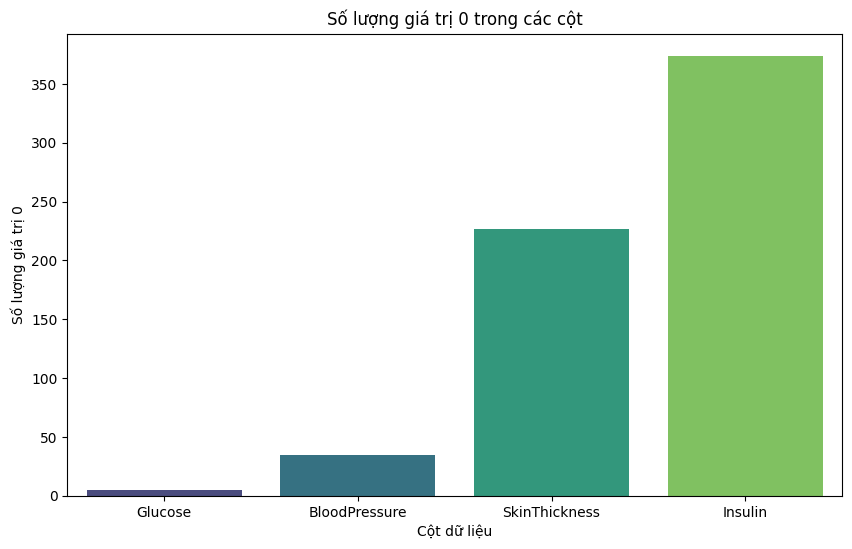

In [19]:
# Biểu đồ barchart hiển thị số lượng giá trị 0 trong các cột Glucose, BloodPressure, SkinThickness, Insulin
zero_counts = (diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values, palette='viridis', hue=zero_counts.index, legend=False)
plt.title('Số lượng giá trị 0 trong các cột')
plt.ylabel('Số lượng giá trị 0')
plt.xlabel('Cột dữ liệu')
plt.show()

- Biểu đồ cho thấy số lượng giá trị 0 trong các cột dữ liệu quan trọng như Glucose, BloodPressure, SkinThickness và Insulin.
- Việc có nhiều giá trị 0 trong các cột này có thể ảnh hưởng đến chất lượng phân tích và mô hình hóa dữ liệu.
- Biện pháp: Xử lý giá trị 0 bằng cách thay thế chúng bằng giá trị trung vị của cột tương ứng, như đã thực hiện trong bước tiền xử lý dữ liệu.



# **Làm sạch dữ liệu**

Làm sạch dữ liệu là một bước quan trọng trước khi Phân tích Khám phá Dữ liệu (EDA) vì nó sẽ loại bỏ các dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả của EDA.

Trong quá trình làm sạch dữ liệu, chúng ta sẽ thực hiện các bước sau:

+ Loại bỏ các hàng trùng lặp.

+ Xử lý các giá trị bị thiếu.

+ Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.

+ Thêm các cột quan trọng (nếu cần).

## **Bước 1: Loại bỏ trùng lặp**

In [20]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Kết quả: (0, 9): 0 dòng, 9 cột  
=> Bảng dữ liệu không có dữ liệu trùng lặp

In [21]:
# Hiển thị kích thước của dataframe
df1.shape

(768, 9)

Bảng dữ liệu có 768 hàng và 9 cột

## **Bước 2: Xử lý các giá trị bị thiếu**

In [22]:
# Cột có giá trị thiếu
df1.isnull().sum().sort_values(ascending = False)[:6]

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Không có giá trị thiếu trong các cột dữ liệu

Tuy nhiên. Vì các cột dữ liệu "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" có dữ liệu '0' được xem là dữ liệu thiếu (vì các giá trị này không thể bằng 0) nên chúng ta sẽ thay thế chúng bằng giá trị trung vị để tránh ảnh hưởng bởi các giá trị ngoại lai

- Giá trị trung vị (median) là giá trị ở giữa khi các giá trị được sắp xếp theo thứ tự  
Ví dụ: trong cột 'Glucose', nếu có các giá trị [0, 85, 90, 95, 100], giá trị trung vị là 90
- Giá trị ngoại lai (outliers) là các giá trị nằm xa so với phần lớn các giá trị khác trong tập dữ liệu  
Ví dụ: trong cột 'Insulin', nếu có các giá trị [0, 15, 20, 25, 300], giá trị 300 là một giá trị ngoại lai vì nó nằm xa so với các giá trị khác
- Việc sử dụng giá trị trung vị giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai này khi thay thế các giá trị 0, giúp duy trì tính toàn vẹn của dữ liệu, tránh việc làm sai lệch các phân tích sau này

In [23]:
# Danh sách các cột có giá trị 0 cần xử lý
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Duyệt qua từng cột và thay thế giá trị 0 bằng giá trị trung vị
for column in columns_to_process:
    # Lấy giá trị trung vị của cột, bỏ qua các giá trị 0
    median_value = df1[df1[column] != 0][column].median()

    # Thay thế các giá trị 0 bằng giá trị trung vị
    df1[column] = df1[column].replace(0, median_value)

In [24]:
# Kiểm tra lại các cột để đảm bảo không còn giá trị 0
print(df1[columns_to_process].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Hàng "min" của các cột dữ liệu "Glucose" "BloodPressure" "SkinThickness" "Insulin" "BMI" đều có giá trị >0. Vì vậy các cột này đã được xử lý các dữ liệu thiếu

## **Bước 3: Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.**

Sau khi kiểm tra cấu trúc dữ liệu, các kiểu dữ liệu của từng cột đã được xác định là phù hợp với nội dung của chúng (số nguyên cho các biến đếm và số thực cho các chỉ số). Do đó, không cần thực hiện bất kỳ thay đổi nào đối với kiểu dữ liệu. Bước này xác nhận rằng dữ liệu đã sẵn sàng cho quá trình phân tích tiếp theo.

## **Bước 4: Thêm các cột quan trọng.**

In [25]:
import pandas as pd

# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df

# Tạo cột phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Gầy'
    elif 18.5 <= bmi < 24.9:
        return 'Bình thường'
    elif 24.9 <= bmi < 29.9:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(classify_bmi)

# Tạo cột phân loại Glucose
def classify_glucose(glucose):
    if glucose < 110:
        return 'Bình thường'
    elif 110 <= glucose < 126:
        return 'Tiền tiểu đường'
    else:
        return 'Tiểu đường'

df1['Glucose_Category'] = df1['Glucose'].apply(classify_glucose)


# Tạo một hàm đơn giản để phân loại chỉ số DiabetesPedigreeFunction
def classify_pedigree(score):
    if score >= 0.5:
        return 'Nguy cơ cao'
    else:
        return 'Nguy cơ thấp'

# Áp dụng hàm để tạo cột mới 'Family_History'
df1['Family_History'] = df1['DiabetesPedigreeFunction'].apply(classify_pedigree)

In [26]:
# Hiển thị 5 dòng đầu tiên của dataframe
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Category,Family_History
0,6,148,72,35,125,33.6,0.627,50,1,Béo phì,Tiểu đường,Nguy cơ cao
1,1,85,66,29,125,26.6,0.351,31,0,Thừa cân,Bình thường,Nguy cơ thấp
2,8,183,64,29,125,23.3,0.672,32,1,Bình thường,Tiểu đường,Nguy cơ cao
3,1,89,66,23,94,28.1,0.167,21,0,Thừa cân,Bình thường,Nguy cơ thấp
4,0,137,40,35,168,43.1,2.288,33,1,Béo phì,Tiểu đường,Nguy cơ cao


Việc thêm các cột phân loại như BMI_Category, Glucose_Category và Family_History giúp chúng ta chuyển đổi dữ liệu thô thành các nhóm có ý nghĩa lâm sàng. Các cột này làm nổi bật mối liên hệ giữa tình trạng cân nặng, mức đường huyết, tiền sử gia đình và nguy cơ mắc bệnh tiểu đường của bệnh nhân.

# **EDA**

Trước tiên, hãy tìm mối tương quan giữa các dữ liệu số.

Vì các cột như Outcome là dữ liệu phân loại, nên chúng ta sẽ không cần kiểm tra mối tương quan giữa chúng với nhau (Outcome chỉ dùng làm biến mục tiêu).

Ngoài ra, một số cột đã thể hiện thông tin tổng hợp, ví dụ: nếu tính được BMI đã phản ánh cân nặng và chiều cao, nên có thể loại bỏ các cột thừa như cân nặng (Weight), chiều cao (Height) để tránh trùng lặp.

In [27]:
num_df = df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

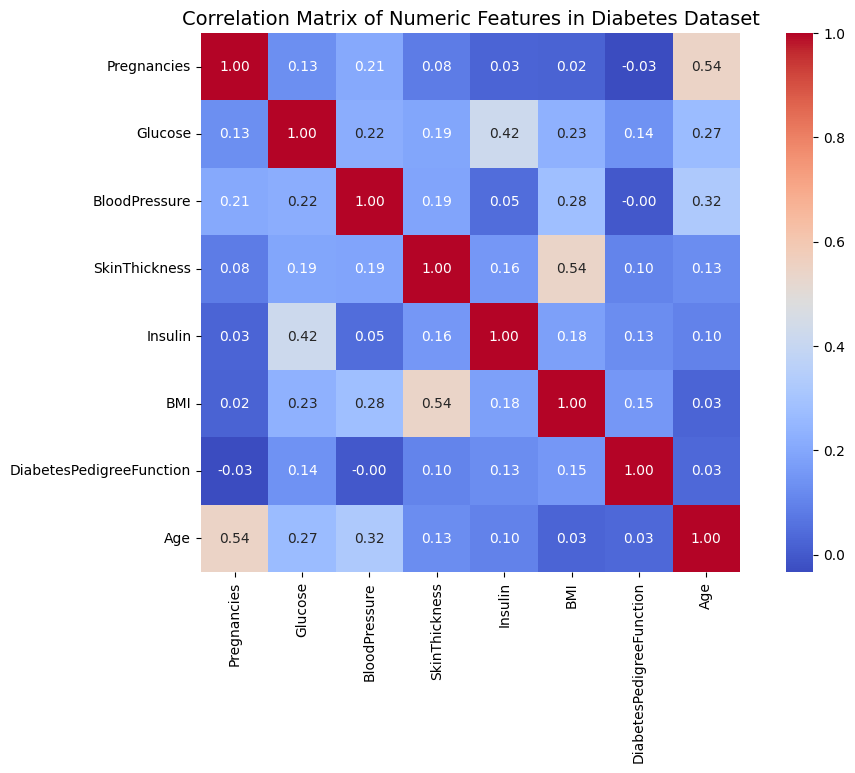

In [28]:
# Tính ma trận tương quan
corrmat = num_df.corr()

# Vẽ heatmap
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={'size': 10}, vmax=1, square=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features in Diabetes Dataset', fontsize=14)
plt.show()

Age và Pregnancies có mối tương quan 0.54
→ Điều này có nghĩa là tuổi bệnh nhân càng cao thì số lần mang thai càng nhiều. Đây là mối quan hệ hợp lý vì phụ nữ lớn tuổi có nhiều cơ hội mang thai hơn trong đời.

BMI và SkinThickness có mối tương quan 0.54
→ Điều này có nghĩa là bệnh nhân có chỉ số khối cơ thể (BMI) cao thường có độ dày da ở vùng tam giác vai lớn hơn. Đây cũng hợp lý, vì BMI cao thường đi kèm với dự trữ mỡ dưới da nhiều hơn, dẫn đến SkinThickness lớn hơn.

### **(1) Phân tích nhân khẩu học (Demographic Analysis)**


**Phân tích nhân khẩu học** (Demographic Analysis) là việc tìm hiểu và mô tả các đặc điểm của con người trong tập dữ liệu, như tuổi, giới tính, số lần mang thai, chỉ số BMI…
Mục đích là hiểu đặc điểm dân số, xác định xu hướng và mối quan hệ giữa các yếu tố cá nhân với kết quả nghiên cứu (ví dụ: mắc tiểu đường hay không).

#### **Q1) Tuổi trung bình của bệnh nhân là bao nhiêu?**

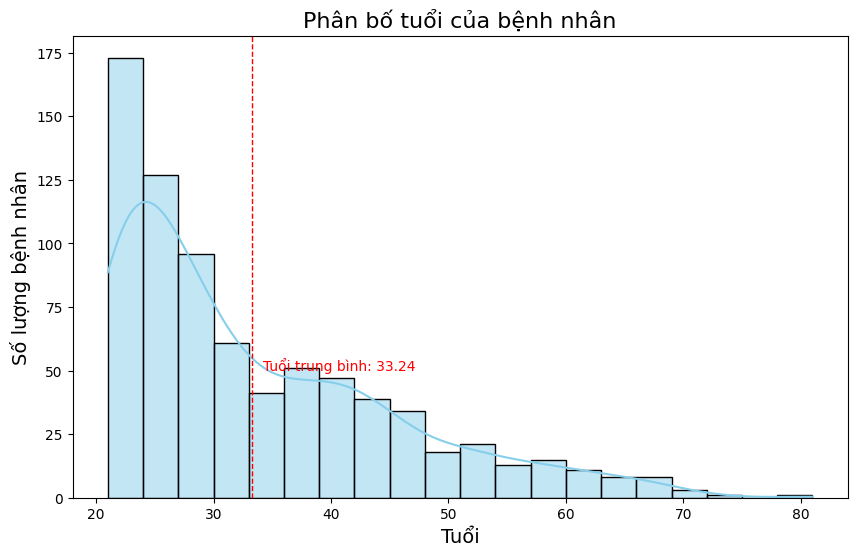

In [29]:
# Biểu đồ histogram thể hiện phân bố tuổi của bệnh nhân.
# Đường màu đỏ đứng yên thể hiện tuổi trung bình của bệnh nhân.
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố tuổi của bệnh nhân', fontsize=16)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['Age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['Age'].mean()+1, 50, f'Tuổi trung bình: {df1["Age"].mean():.2f}', color='red')
plt.show()

**Tuổi trung bình của bệnh nhân là 33.24 tuổi**
- Biểu đồ cho thấy phân bố tuổi của bệnh nhân trong dataset. Phần lớn bệnh nhân nằm trong khoảng tuổi từ 20 đến 40, sau đó số lượng bệnh nhân giảm dần.
- Đường màu đỏ đứng yên thể hiện tuổi trung bình của bệnh nhân, khoảng 33.24 tuổi. Điều này cho thấy rằng bệnh tiểu đường có thể ảnh hưởng đến người trẻ tuổi hơn so với quan niệm phổ biến rằng nó chủ yếu ảnh hưởng đến người lớn tuổi.  

#### **Q2) Nhóm tuổi nào chiếm tỷ lệ cao nhất trong tập dữ liệu?**

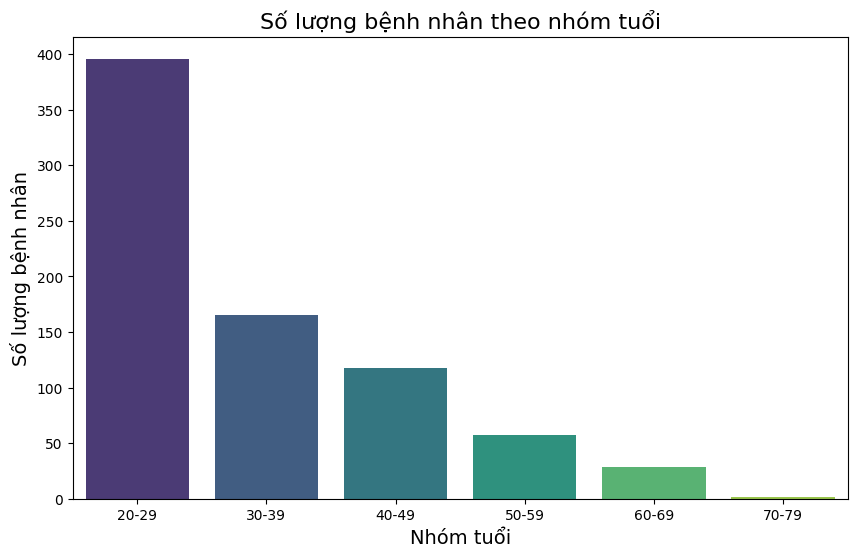

In [30]:
# biểu đồ Cột hiển thị số lượng bệnh nhân trong mỗi nhóm tuổi.
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df1['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis', hue=age_group_counts.index, legend=False)
plt.title('Số lượng bệnh nhân theo nhóm tuổi', fontsize=16)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.show()

**Nhóm tuổi 20-29 chiếm số lượng bệnh nhân cao nhất**
- Biểu đồ cho thấy nhóm tuổi 20-29 chiếm số lượng bệnh nhân cao nhất trong tập dữ liệu. Điều này có thể phản ánh xu hướng gia tăng bệnh tiểu đường ở người trẻ tuổi, có thể do lối sống không lành mạnh, chế độ ăn uống kém và thiếu hoạt động thể chất.
- Biểu đồ cũng cho thấy sự phân bố số lượng bệnh nhân trong các nhóm tuổi khác nhau. Mặc dù nhóm tuổi 20-29 chiếm số lượng cao nhất, nhưng các nhóm tuổi khác cũng có sự hiện diện đáng kể, cho thấy bệnh tiểu đường ảnh hưởng đến nhiều lứa tuổi khác nhau.    

→ **Kết quả của Q1 và Q2**: Bệnh tiểu đường không chỉ ảnh hưởng đến người lớn tuổi mà còn có xu hướng gia tăng ở người trẻ tuổi. Điều này nhấn mạnh tầm quan trọng của việc nâng cao nhận thức về bệnh tiểu đường và thúc đẩy lối sống lành mạnh trong tất cả các nhóm tuổi để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

#### **Q3) Trung bình số lần mang thai của bệnh nhân là bao nhiêu?**

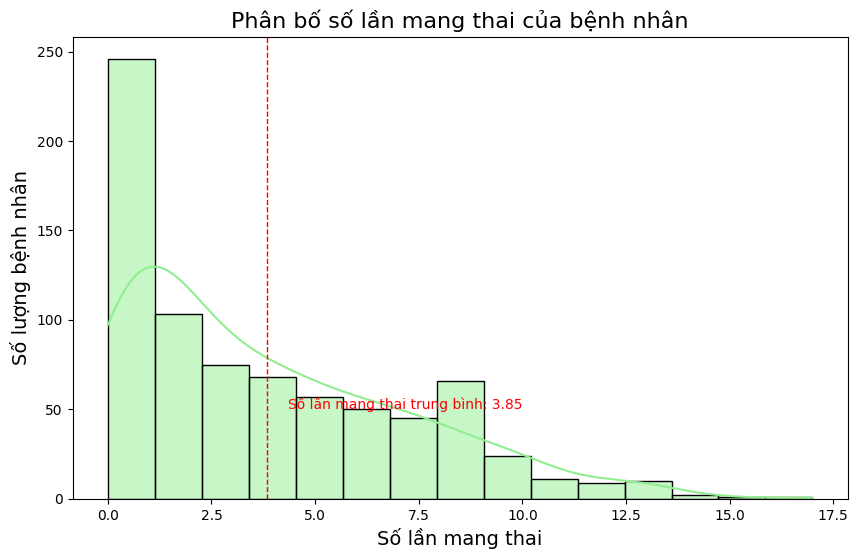

In [31]:
# Biểu đồ histogram thể hiện phân bố số lần mang thai của bệnh nhân.
# Đường màu đỏ đứng yên thể hiện số lần mang thai trung bình của bệnh nhân.
plt.figure(figsize=(10, 6))
sns.histplot(df1['Pregnancies'], bins=15, kde=True, color='lightgreen')
plt.title('Phân bố số lần mang thai của bệnh nhân', fontsize=16)
plt.xlabel('Số lần mang thai', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['Pregnancies'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['Pregnancies'].mean()+0.5, 50, f'Số lần mang thai trung bình: {df1["Pregnancies"].mean():.2f}', color='red')
plt.show()

**Số lần mang thai trung bình là 3.85.**
- Biểu đồ cho thấy phân bố số lần mang thai của bệnh nhân trong dataset. Phần lớn bệnh nhân có từ 0 đến 5 lần mang thai, với một số ít bệnh nhân có số lần mang thai cao hơn.
- Đường màu đỏ đứng yên thể hiện số lần mang thai trung bình của bệnh nhân, khoảng 3.85 lần. Điều này cho thấy rằng số lần mang thai không quá cao trong nhóm bệnh nhân này.  
 **→** Nhấn mạnh tầm quan trọng của việc theo dõi và quản lý sức khỏe sinh sản, đặc biệt là đối với những phụ nữ có nguy cơ mắc bệnh tiểu đường. Việc duy trì lối sống lành mạnh và kiểm tra sức khỏe định kỳ có thể giúp phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

#### **Q4) Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) chiếm bao nhiêu phần trăm?**

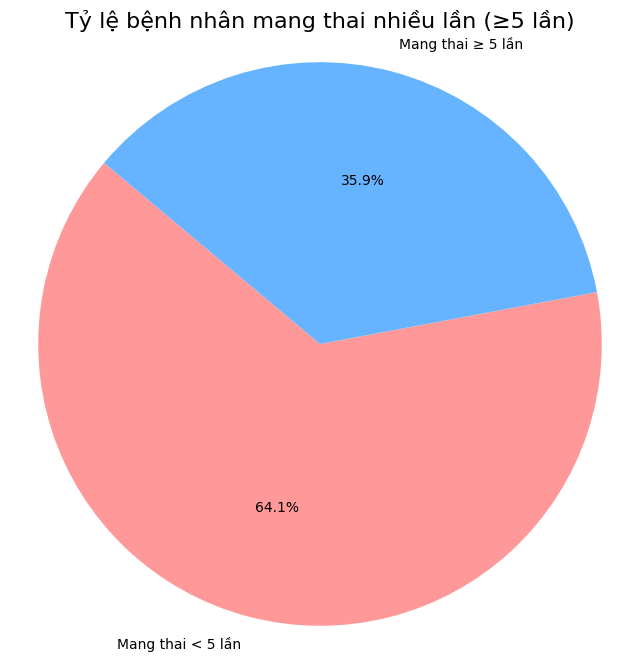

In [32]:
# Biểu đồ tròn thể hiện tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) so với tổng số bệnh nhân trong dataset.
# Biểu đồ tròn thể hiện tỷ lệ rõ ràng.
pregnancy_counts = df1['Pregnancies'].value_counts()
pregnancy_5_or_more = pregnancy_counts[pregnancy_counts.index >= 5].sum()
pregnancy_less_than_5 = pregnancy_counts[pregnancy_counts.index < 5].sum()
labels = ['Mang thai < 5 lần', 'Mang thai ≥ 5 lần']
sizes = [pregnancy_less_than_5, pregnancy_5_or_more]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần)', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) chiếm khoảng 35.9% tổng số bệnh nhân**
- Biểu đồ cho thấy tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần) chiếm khoảng 35.9% tổng số bệnh nhân trong dataset. Điều này cho thấy một phần đáng kể bệnh nhân có tiền sử mang thai nhiều lần, điều này có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.  
**→** Nhấn mạnh tầm quan trọng của việc theo dõi và quản lý sức khỏe sinh sản, đặc biệt là đối với những phụ nữ có nguy cơ mắc bệnh tiểu đường. Việc duy trì lối sống lành mạnh và kiểm tra sức khỏe định kỳ có thể giúp phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


#### **Q5) Số lần mang thai trung bình có tăng theo độ tuổi của bệnh nhân không?**

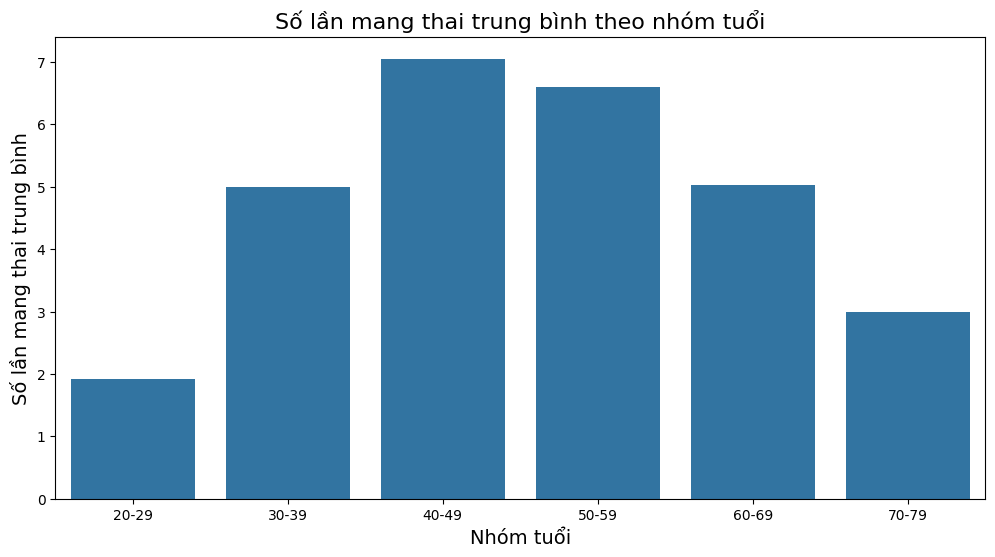

In [36]:
# biểu đồ bar chart thể hiện số lần mang thai trung bình tăng theo độ tuổi của bệnh nhân.
plt.figure(figsize=(12,6))
sns.barplot(x='Age_Group', y='Pregnancies', data=df1, errorbar=None)
plt.title('Số lần mang thai trung bình theo nhóm tuổi', fontsize=16)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Số lần mang thai trung bình', fontsize=14)
plt.show()

**Số lần mang thai trung bình tăng theo độ tuổi của bệnh nhân.**
- Biểu đồ cho thấy một mối quan hệ giữa độ tuổi và số lần mang thai trung bình. Cụ thể, khi độ tuổi tăng lên, số lần mang thai trung bình cũng có xu hướng tăng theo. Điều này phản ánh thực tế rằng phụ nữ lớn tuổi hơn có nhiều khả năng đã trải qua nhiều lần mang thai hơn so với phụ nữ trẻ tuổi.  
- Biểu đồ cũng cho thấy sự phân bố dữ liệu khá rộng, với một số bệnh nhân trẻ tuổi có số lần mang thai cao và ngược lại. Điều này cho thấy rằng số lần mang thai không chỉ phụ thuộc vào độ tuổi mà còn có thể bị ảnh hưởng bởi các yếu tố khác như tình trạng hôn nhân, kế hoạch gia đình và lối sống.  
**→** Nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe định kỳ và duy trì lối sống lành mạnh, đặc biệt là đối với những phụ nữ lớn tuổi, để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

#### **Q6) Tuổi có ảnh hưởng trực tiếp đến Outcome không?**

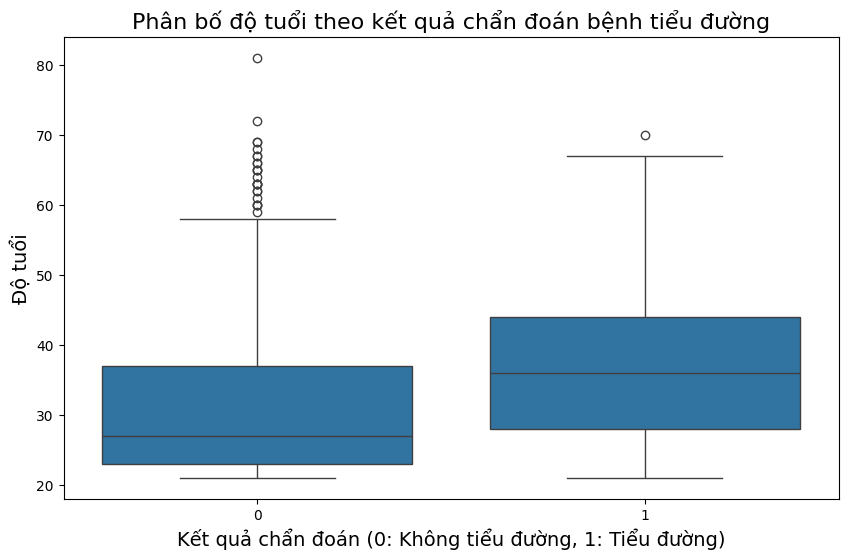

In [34]:
# Boxplot thể hiện sự phân bố tuổi của bệnh nhân dựa trên kết quả chẩn đoán tiểu đường (Outcome).
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Age', data=df1)
# tiếng việt
plt.title('Phân bố độ tuổi theo kết quả chẩn đoán bệnh tiểu đường', fontsize=16)
plt.xlabel('Kết quả chẩn đoán (0: Không tiểu đường, 1: Tiểu đường)', fontsize=14)
plt.ylabel('Độ tuổi', fontsize=14)
plt.show()


**Tuổi có ảnh hưởng trực tiếp đến kết quả chẩn đoán tiểu đường.**
- Biểu đồ cho thấy sự khác biệt rõ rệt về tuổi giữa hai nhóm bệnh nhân, nhóm không bị tiểu đường (Outcome = 0) có độ tuổi trung bình thấp hơn so với nhóm bị tiểu đường (Outcome = 1). Điều này cho thấy tuổi có thể là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu trong mỗi nhóm. Nhóm không bị tiểu đường có sự phân bố tuổi rộng hơn, trong khi nhóm bị tiểu đường có sự tập trung tuổi cao hơn. Điều này có thể phản ánh thực tế rằng bệnh tiểu đường thường xuất hiện ở những người lớn tuổi hơn.  
**→** Người lớn tuổi có nguy cơ cao hơn bị tiểu đường so với người trẻ tuổi. Điều này nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe định kỳ và duy trì lối sống lành mạnh, đặc biệt là đối với những người lớn tuổi, để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.




#### **Q7) Nhóm phụ nữ nhiều lần mang thai và tuổi cao có tỷ lệ tiểu đường cao hơn không?**

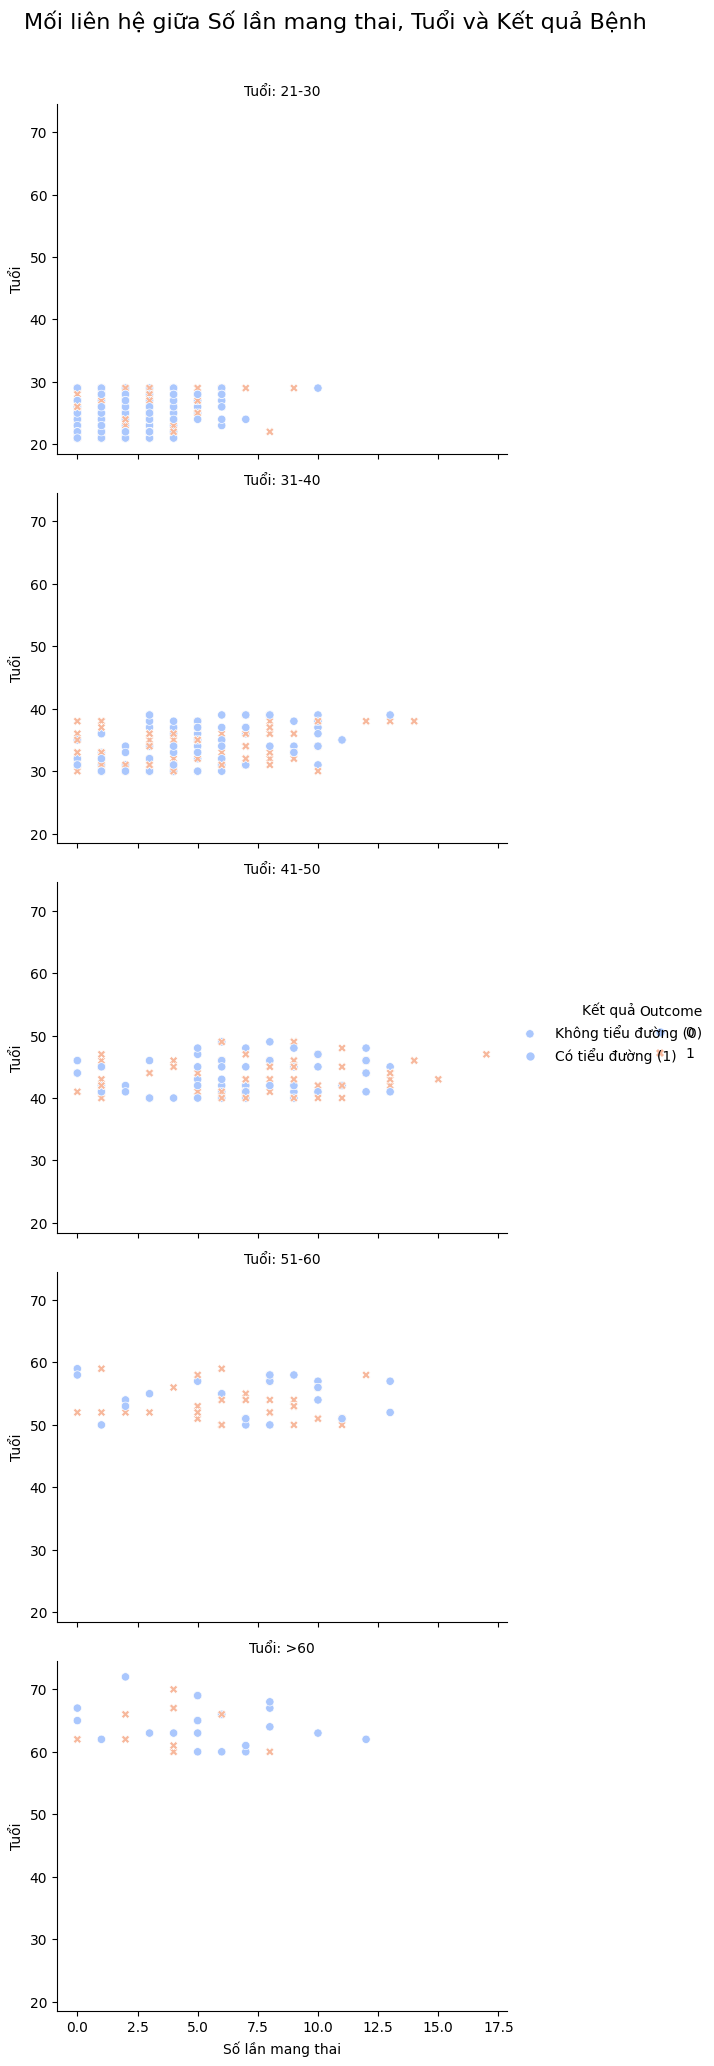

In [48]:
# biểu đồ bar chart thể hiện tỷ lệ tiểu đường tăng theo số lần mang thai và nhóm tuổi của bệnh nhân.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Bước 1: Phân loại Age thành các nhóm để dễ trực quan
# Cập nhật bin cho Age để phân phối đều hơn giữa các nhóm
bins_age = [df1['Age'].min(), 30, 40, 50, 60, df1['Age'].max()]
labels_age = ['21-30', '31-40', '41-50', '51-60', '>60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins_age, labels=labels_age, right=False, include_lowest=True)
# Bước 2: Tạo biểu đồ tổ hợp với bố cục hàng dọc
# Tăng kích thước hình để dễ nhìn hơn
g = sns.relplot(
    data=df1,
    x='Pregnancies',
    y='Age',
    row='Age_Group',
    hue='Outcome',
    palette='coolwarm', # Palette dễ phân biệt 0 và 1
    style='Outcome',
    height=4, # Chiều cao của mỗi subplot
    aspect=1.2 # Tỷ lệ khung hình của mỗi subplot
)
# Đặt tiêu đề cho các subplot và trục
g.fig.suptitle('Mối liên hệ giữa Số lần mang thai, Tuổi và Kết quả Bệnh', fontsize=16, y=1.03) # y điều chỉnh vị trí tiêu đề
# Cải thiện nhãn trục cho từng subplot
g.set_titles("Tuổi: {row_name}")
g.set_axis_labels("Số lần mang thai", "Tuổi")
# Cải thiện nhãn chú giải (legend)
g.add_legend(title='Kết quả', labels=['Không tiểu đường (0)', 'Có tiểu đường (1)'])
plt.show()

Biểu đồ  cho thấy mối quan hệ giữa số lần mang thai, tuổi và kết quả chẩn đoán bệnh tiểu đường ở phụ nữ. Dưới đây là phân tích chi tiết dựa trên biểu đồ:  
  **+ Nhóm phụ nữ trẻ (21-30 tuổi):** Trong nhóm tuổi này, số lần mang thai có vẻ không ảnh hưởng đáng kể đến nguy cơ mắc bệnh tiểu đường. Các trường hợp mắc bệnh (biểu tượng "x" màu cam) xuất hiện rải rác, không tập trung ở những người có số lần mang thai cao. Điều này cho thấy rằng ở phụ nữ trẻ, các yếu tố khác ngoài số lần mang thai có thể đóng vai trò quan trọng hơn trong việc xác định nguy cơ mắc bệnh tiểu đường.  
  **+ Nhóm phụ nữ trung niên (31-50 tuổi):** Ở nhóm tuổi này, có một xu hướng rõ ràng hơn. Các trường hợp mắc bệnh bắt đầu tập trung ở những phụ nữ có số lần mang thai từ 3 trở lên. Điều này cho thấy rằng số lần mang thai có thể bắt đầu ảnh hưởng đến nguy cơ mắc bệnh tiểu đường khi phụ nữ bước vào độ tuổi trung niên. Tuy nhiên, vẫn có những trường hợp mắc bệnh ở phụ nữ có số lần mang thai thấp, cho thấy rằng các yếu tố khác cũng đóng vai trò quan trọng.  
  **+ Nhóm phụ nữ lớn tuổi (51-60 tuổi và >60 tuổi):** Trong nhóm phụ nữ lớn tuổi, số lần mang thai dường như có ảnh hưởng mạnh mẽ hơn đến nguy cơ mắc bệnh tiểu đường. Các trường hợp mắc bệnh tập trung rõ rệt ở những phụ nữ có số lần mang thai từ 4 trở lên. Điều này cho thấy rằng ở phụ nữ lớn tuổi, số lần mang thai có thể là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường. Tuy nhiên, vẫn có những trường hợp mắc bệnh ở phụ nữ có số lần mang thai thấp, cho thấy rằng tuổi tác và các yếu tố khác cũng đóng vai trò quan trọng.  
**→** Biểu đồ cho thấy rằng số lần mang thai có ảnh hưởng đến nguy cơ mắc bệnh tiểu đường, đặc biệt là ở phụ nữ lớn tuổi. Tuy nhiên, mối quan hệ này không hoàn toàn tuyến tính và có thể bị ảnh hưởng bởi các yếu tố khác như tuổi tác và các yếu tố sức khỏe khác. Do đó, việc đánh giá nguy cơ mắc bệnh tiểu đường nên xem xét một cách toàn diện, bao gồm cả số lần mang thai và các yếu tố khác.

### **(2) Phân tích chỉ số cơ thể (BMI Analysis)**


#### **Q1) Giá trị BMI trung bình là bao nhiêu?**

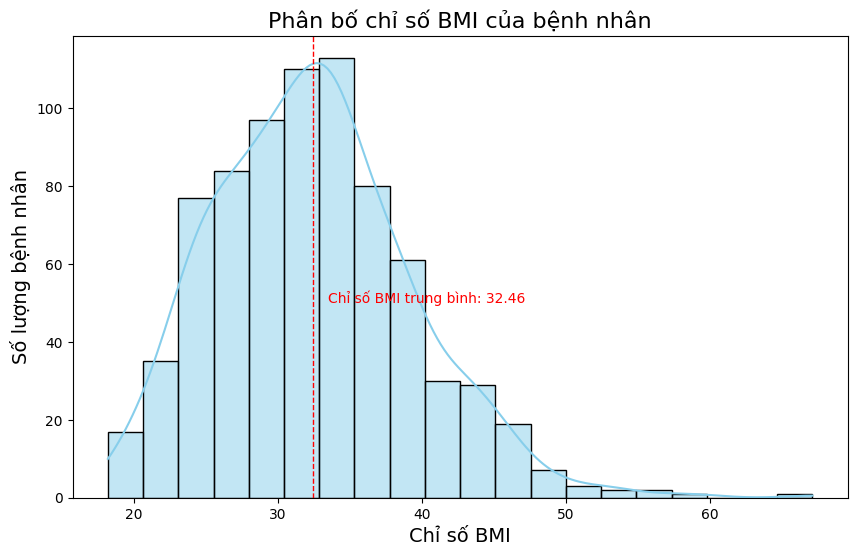

In [ ]:
# Biểu đồ histogram thể hiện phân bố của chỉ số BMI trong tập dữ liệu.
plt.figure(figsize=(10, 6))
sns.histplot(df1['BMI'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố chỉ số BMI của bệnh nhân', fontsize=16)
plt.xlabel('Chỉ số BMI', fontsize=14)
plt.ylabel('Số lượng bệnh nhân', fontsize=14)
plt.axvline(df1['BMI'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df1['BMI'].mean()+1, 50, f'Chỉ số BMI trung bình: {df1["BMI"].mean():.2f}', color='red')
plt.show()

**Chỉ số BMI trung bình của bệnh nhân trong tập dữ liệu là khoảng 32.46**
- Biểu đồ cho thấy phân bố của chỉ số BMI trong tập dữ liệu. Phần lớn bệnh nhân có chỉ số BMI nằm trong khoảng từ 20 đến 35, với một số ít bệnh nhân có chỉ số BMI rất cao (trên 40).
- Đường thẳng màu đỏ trên biểu đồ đại diện cho giá trị trung bình của chỉ số BMI, được hiển thị là khoảng 32.46. Điều này cho thấy rằng trung bình bệnh nhân trong tập dữ liệu có chỉ số BMI nằm trong phạm vi thừa cân hoặc béo phì, điều này có thể liên quan đến nguy cơ mắc bệnh tiểu đường.  
 **→** Nhiều bệnh nhân có nguy cơ cao mắc bệnh tiểu đường do thừa cân hoặc béo phì. Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.

#### **Q2) Tỷ lệ bệnh nhân thừa cân và béo phì?**

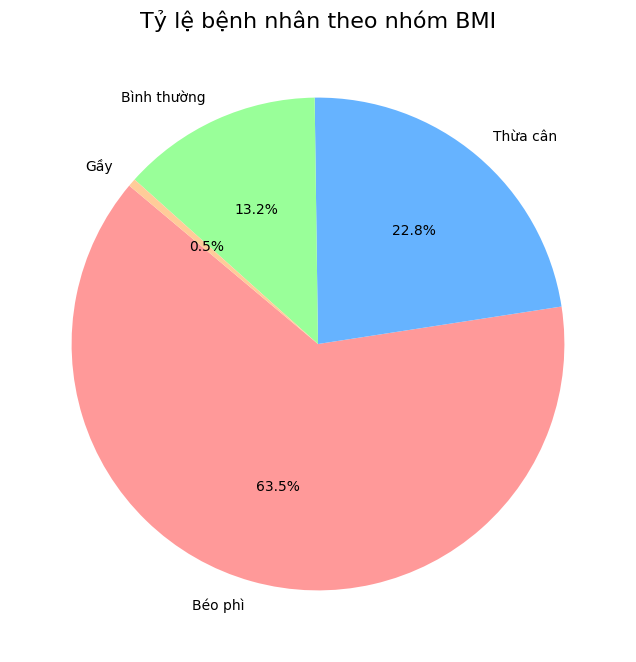

In [ ]:
# Biểu đồ pie chart thể hiện tỷ lệ phần trăm của các nhóm BMI trong tập dữ liệu.
bmi_counts = df1['BMI_Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tỷ lệ bệnh nhân theo nhóm BMI', fontsize=16)
plt.show()

**Tỷ lệ bệnh nhân thừa cân và béo phì trong tập dữ liệu là khá cao, bệnh nhân thừa cân chiếm tỷ lệ 63.5% và bệnh nhân thừa cân chiếm tỷ lệ là 22.8%.**
- Biểu đồ cho thấy tỷ lệ phần trăm của các nhóm BMI trong tập dữ liệu. Chúng ta có thể thấy rằng nhóm "Béo phí" chiếm tỷ lệ lớn nhất, tiếp theo là nhóm "Thừa cân", trong khi nhóm "Gầy" chiếm tỷ lệ nhỏ nhất. Điều này phản ánh thực tế rằng nhiều bệnh nhân trong tập dữ liệu có nguy cơ cao mắc bệnh tiểu đường do thừa cân hoặc béo phì.  
 **→** Nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


#### **Q3) BMI ảnh hưởng thế nào đến khả năng mắc tiểu đường (Outcome)?**

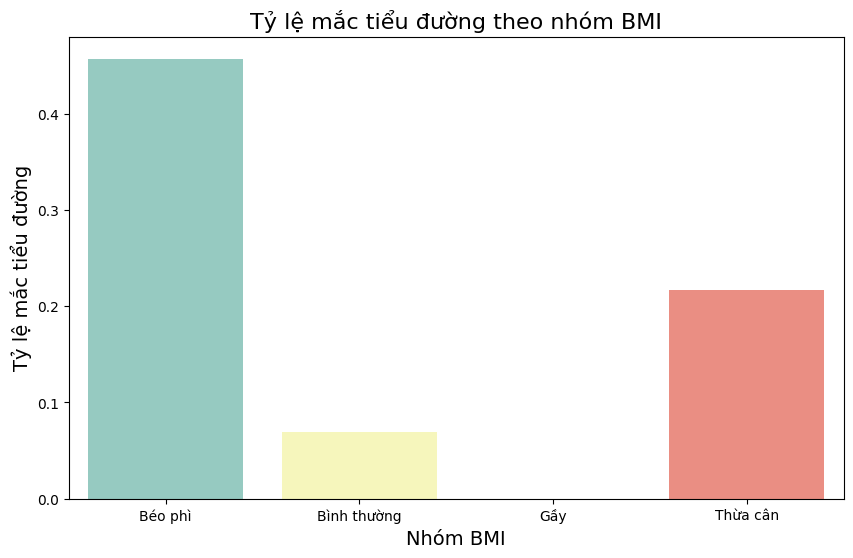

In [ ]:
# Biểu đồ bar chart thể hiện tỷ lệ mắc tiểu đường (Outcome) trong từng nhóm BMI.
bmi_outcome = df1.groupby('BMI_Category')['Outcome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Outcome', data=bmi_outcome, palette='Set3', hue='BMI_Category', legend=False)
plt.title('Tỷ lệ mắc tiểu đường theo nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI', fontsize=14)
plt.ylabel('Tỷ lệ mắc tiểu đường', fontsize=14)
plt.show()

**Chỉ số BMI ảnh hưởng đáng kể đến khả năng mắc tiểu đường.**
- Biểu đồ cho thấy tỷ lệ mắc tiểu đường trong từng nhóm BMI. Chúng ta có thể thấy rằng nhóm "Béo phì" có tỷ lệ mắc tiểu đường cao nhất, tiếp theo là nhóm "Thừa cân", trong khi nhóm "Gầy" hầu như là không có. Điều này phản ánh thực tế rằng chỉ số BMI cao hơn có liên quan đến nguy cơ mắc bệnh tiểu đường.  
 **→** Những người trong nhóm "Béo phì" và "Thừa cân" có nguy cơ cao hơn mắc bệnh tiểu đường so với những người trong nhóm "Bình thường". Điều này nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


#### **Q4) Nồng độ glucose thay đổi theo BMI như thế nào?**  

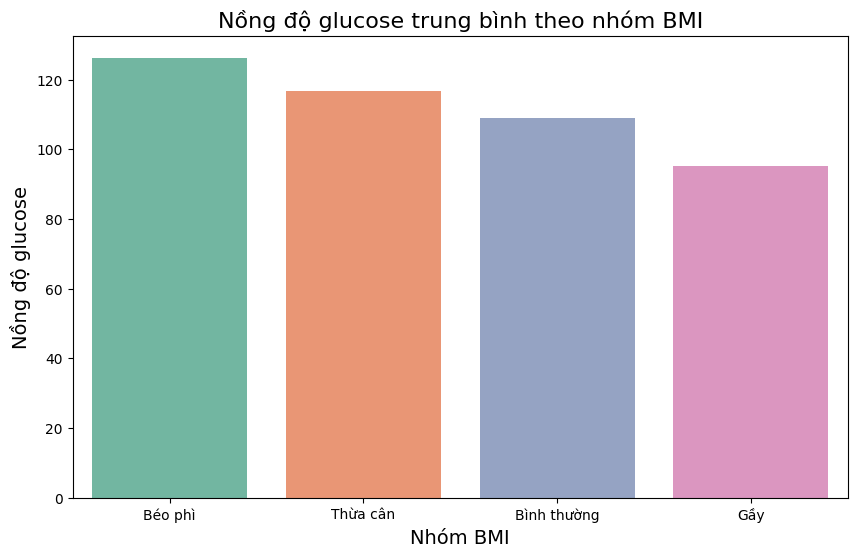

In [38]:
# Biểu đồ bar chart thể hiện nồng độ glucose trung bình theo nhóm BMI.
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='Glucose', data=df1, hue='BMI_Category', palette='Set2', legend=False, errorbar=None)
plt.title('Nồng độ glucose trung bình theo nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI', fontsize=14)
plt.ylabel('Nồng độ glucose', fontsize=14)
plt.show()

**Nồng độ glucose thay đổi theo chỉ số BMI, với xu hướng tăng nồng độ glucose khi chỉ số BMI tăng lên.**
- Biểu đồ cho thấy một mối quan hệ giữa chỉ số BMI và nồng độ glucose trong máu. Cụ thể, khi chỉ số BMI tăng lên, nồng độ glucose cũng có xu hướng tăng theo. Điều này phản ánh thực tế rằng thừa cân và béo phì có thể làm tăng nguy cơ mắc bệnh tiểu đường do ảnh hưởng đến khả năng kiểm soát đường huyết.
- Biểu đồ cũng cho thấy sự phân bố dữ liệu khá rộng, với một số bệnh nhân có chỉ số BMI cao nhưng nồng độ glucose thấp và ngược lại. Điều này cho thấy rằng nồng độ glucose không chỉ phụ thuộc vào chỉ số BMI mà còn có thể bị ảnh hưởng bởi các yếu tố khác như di truyền, lối sống và chế độ ăn uống.  
**→** Nhấn mạnh tầm quan trọng của việc duy trì lối sống lành mạnh và kiểm soát cân nặng để phòng ngừa và kiểm soát bệnh tiểu đường hiệu quả hơn.


## **(3) Phân tích các chỉ số sinh lý (Physiological Measurements)**

#### **Q1) Phân tích đơn biến chỉ số SkinThickness, Insulin và BloodPressure**


**1. Phân bố của SkinThickness**

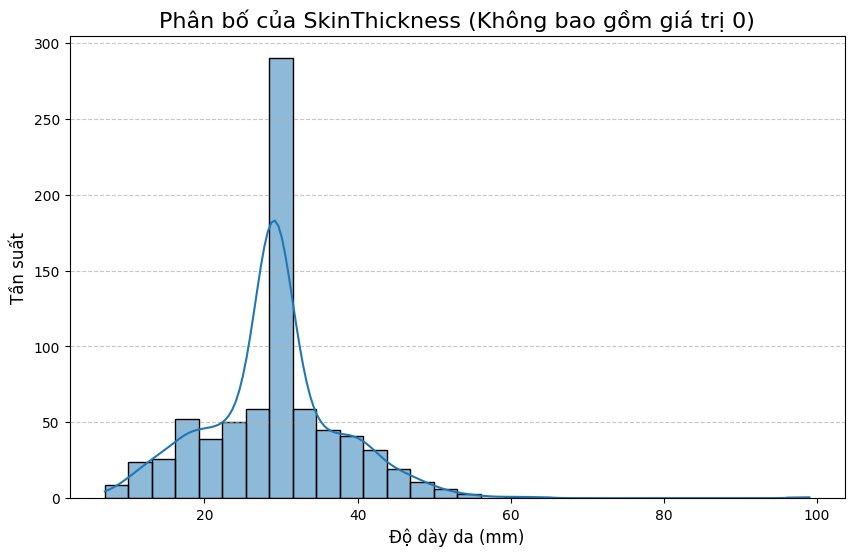

In [ ]:
# @title
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0 để phân tích phân bố rõ hơn
sns.histplot(df1['SkinThickness'], kde=True, bins=30)
plt.title('Phân bố của SkinThickness (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Độ dày da (mm)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **Giá trị trung bình, trung vị, min–max của SkinThickness là bao nhiêu?**

  + Trung bình (mean): khoảng 30 mm
  + Trung vị (median): khoảng 29–30 mm
  + Min – Max: từ 0 mm (giá trị bất thường) đến gần 100 mm

In [ ]:
# @title
skin_thickness_stats = df1['SkinThickness'].describe()
print(f"\n- Giá trị trung bình của SkinThickness (không bao gồm 0): {skin_thickness_stats['mean']:.2f}")
print(f"- Giá trị trung vị của SkinThickness (không bao gồm 0): {skin_thickness_stats.median():.2f}")
print(f"- Giá trị Min của SkinThickness (tất cả dữ liệu): {skin_thickness_stats['min']:.2f}")
print(f"- Giá trị Max của SkinThickness (tất cả dữ liệu): {skin_thickness_stats['max']:.2f}")


- Giá trị trung bình của SkinThickness (không bao gồm 0): 29.11
- Giá trị trung vị của SkinThickness (không bao gồm 0): 29.05
- Giá trị Min của SkinThickness (tất cả dữ liệu): 7.00
- Giá trị Max của SkinThickness (tất cả dữ liệu): 99.00


- **Phân phối SkinThickness có chuẩn (normal distribution) không?**

Không chuẩn:

Biểu đồ lệch phải (right-skewed).

Có “đỉnh” tập trung quanh 29–30 mm.

Ngoài ra, có một số giá trị ngoại lai (outlier) ở mức cao > 70 mm.

In [ ]:
# @title
from scipy.stats import shapiro

# Thực hiện kiểm định Shapiro-Wilk
stat, p_value = shapiro(skin_thickness_stats)

print(f"\n- Thống kê kiểm định Shapiro-Wilk: {stat:.4f}")
print(f"- Giá trị p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n> Kết luận: Phân phối SkinThickness KHÔNG phải là phân phối chuẩn.")
else:
    print("\nKết luận: Phân phối SkinThickness có thể là phân phối chuẩn.")


- Thống kê kiểm định Shapiro-Wilk: 0.5021
- Giá trị p-value: 0.0000

> Kết luận: Phân phối SkinThickness KHÔNG phải là phân phối chuẩn.


- **Nhóm độ dày da nào phổ biến nhất (ví dụ chia bins: thấp, trung bình, cao)?**

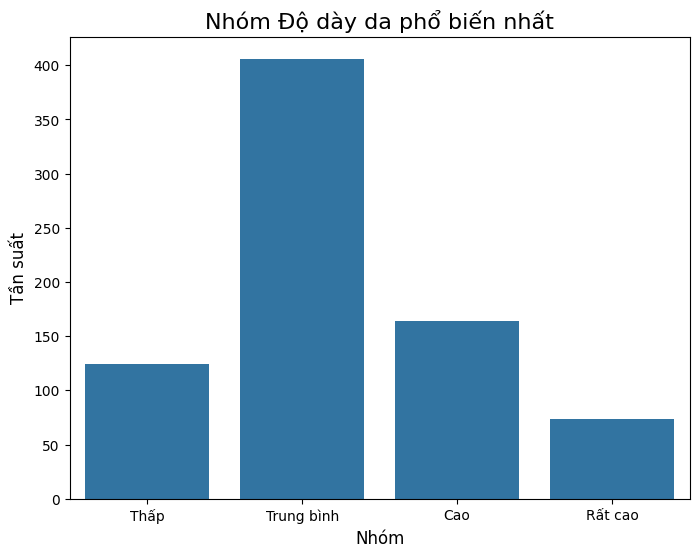

Tần suất phân bố theo nhóm độ dày da:
 SkinThickness_Category
Trung bình    406
Cao           164
Thấp          124
Rất cao        74
Name: count, dtype: int64

Nhóm độ dày da phổ biến nhất là: Trung bình


In [ ]:
# @title
# Tạo các bins dựa trên các phân vị hoặc giá trị bạn tự định nghĩa
bins = [0, 20, 30, 40, df1['SkinThickness'].max()]
labels = ['Thấp', 'Trung bình', 'Cao', 'Rất cao']

# Phân loại dữ liệu vào các bins
df1['SkinThickness_Category'] = pd.cut(df1['SkinThickness'], bins=bins, labels=labels, include_lowest=True)


# Đếm tần suất của mỗi nhóm
skin_thickness_category_counts = df1['SkinThickness_Category'].value_counts()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=skin_thickness_category_counts.index, y=skin_thickness_category_counts.values)
plt.title('Nhóm Độ dày da phổ biến nhất', fontsize=16)
plt.xlabel('Nhóm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()

print("Tần suất phân bố theo nhóm độ dày da:\n", skin_thickness_category_counts)

# Xác định nhóm phổ biến nhất
most_common_skin_thickness_group = skin_thickness_category_counts.idxmax()
print(f"\nNhóm độ dày da phổ biến nhất là: {most_common_skin_thickness_group}")

Nhóm Trung bình (20-35 mm) là phổ biến nhất (hơn 400 người).

**2. Phân bố của Insulin**

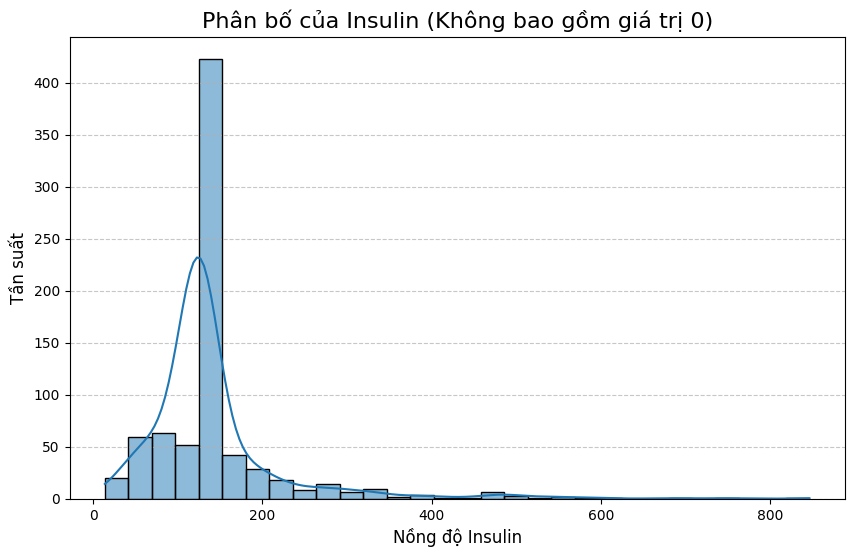

Nồng độ insulin trung bình là: 140.67


In [ ]:
# @title
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0
sns.histplot(df1[df1['Insulin'] != 0]['Insulin'], kde=True, bins=30)
plt.title('Phân bố của Insulin (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Nồng độ Insulin', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Nồng độ insulin trung bình
insulin_mean = df1['Insulin'].mean()
print(f"Nồng độ insulin trung bình là: {insulin_mean:.2f}")

**3. Phân bố của BloodPressure**

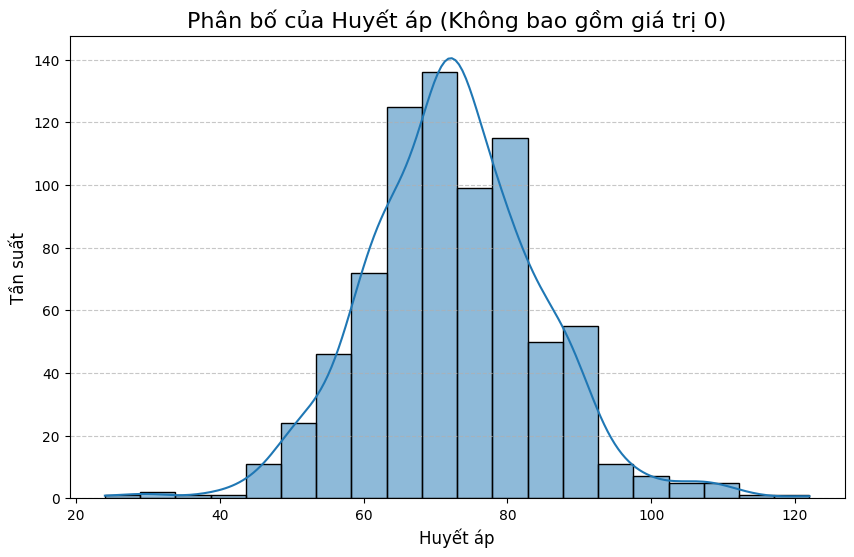

BloodPressure trung bình là: 72.39


In [ ]:
# @title
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0 để phân tích phân bố rõ hơn
sns.histplot(df1[df1['BloodPressure'] != 0]['BloodPressure'], kde=True, bins=20)
plt.title('Phân bố của Huyết áp (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Huyết áp', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# BloodPressure trung bình
blood_pressure_mean = df1['BloodPressure'].mean()
print(f"BloodPressure trung bình là: {blood_pressure_mean:.2f}")

###**Q2) Tỷ lệ mắc tiểu đường thay đổi thế nào theo nhóm SkinThickness**

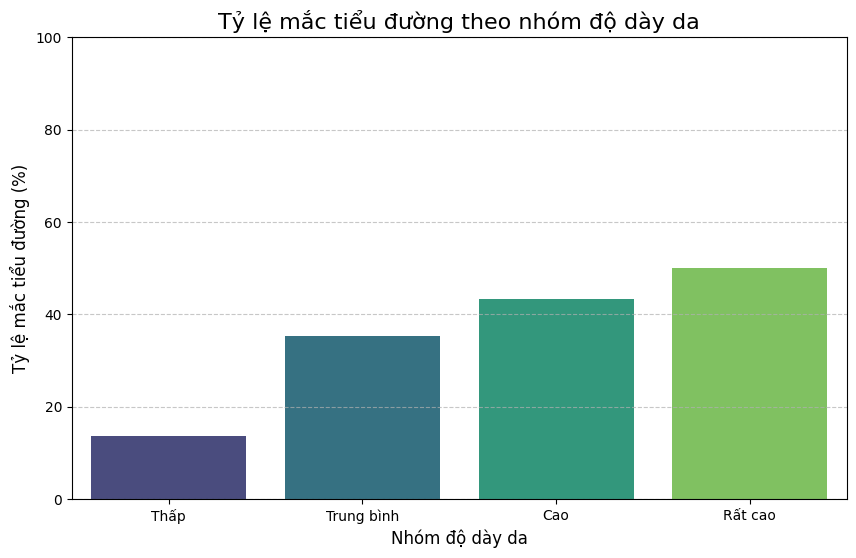

Tỷ lệ mắc tiểu đường theo nhóm độ dày da:
   SkinThickness_Category    Outcome
0                   Thấp  13.709677
1             Trung bình  35.221675
2                    Cao  43.292683
3                Rất cao  50.000000


In [ ]:
# @title
# Tính tỷ lệ mắc tiểu đường theo từng nhóm SkinThickness
skin_thickness_diabetes_rate = df1.groupby('SkinThickness_Category', observed=False)['Outcome'].mean().reset_index()
skin_thickness_diabetes_rate['Outcome'] = skin_thickness_diabetes_rate['Outcome'] * 100 # Chuyển đổi sang phần trăm

# Trực quan hóa kết quả bằng biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='SkinThickness_Category', y='Outcome', data=skin_thickness_diabetes_rate, hue='SkinThickness_Category', palette='viridis', legend=False)
plt.title('Tỷ lệ mắc tiểu đường theo nhóm độ dày da', fontsize=16)
plt.xlabel('Nhóm độ dày da', fontsize=12)
plt.ylabel('Tỷ lệ mắc tiểu đường (%)', fontsize=12)
plt.ylim(0, 100) # Đặt giới hạn trục y từ 0 đến 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Tỷ lệ mắc tiểu đường theo nhóm độ dày da:\n", skin_thickness_diabetes_rate)

- Biểu đồ cho thấy mối quan hệ tương quan giữa độ dày da với outcome (tỉ lệ mắc tiểu đường), các nhóm da có độ dày thấp (ví dụ như nhóm skinThickness: thấp chỉ có ~14%) thường có tỉ lệ mắc bệnh tiểu đường thấp hơn so với các nhóm có độ dày da cao hơn (như là nhóm da có độ dày rất cao có tỉ lệ mắc bệnh tiểu đường là ~50%)  
**→** Những người có độ dày da lớn hơn có nguy cơ cao hơn.

### **Q3) Huyết áp trung bình của nhóm có tiểu đường và không tiểu đường khác nhau ra sao?**

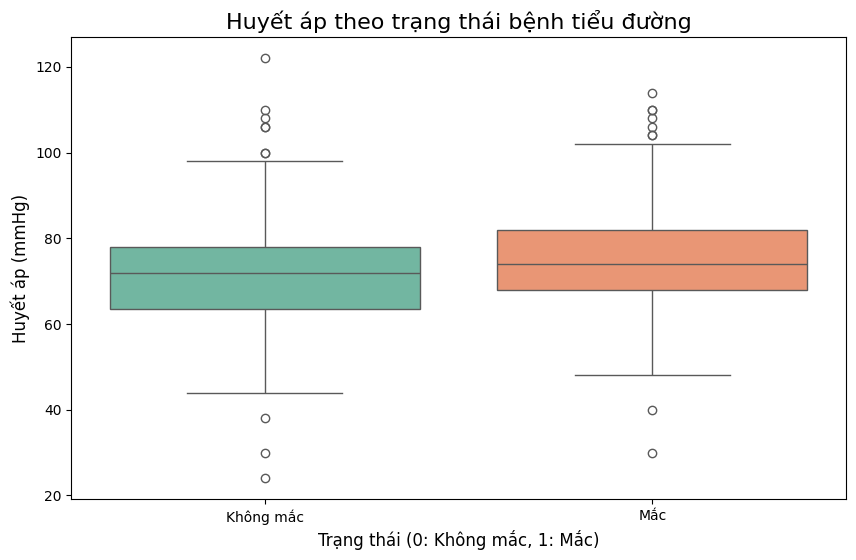

Huyết áp trung bình theo nhóm (0: Không tiểu đường, 1: Tiểu đường):
 Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64


In [ ]:
# @title
blood_pressure_by_outcome = df1.groupby('Outcome')['BloodPressure'].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df1, hue='Outcome', palette='Set2', legend=False)
plt.title('Huyết áp theo trạng thái bệnh tiểu đường', fontsize=16)
plt.xlabel('Trạng thái (0: Không mắc, 1: Mắc)', fontsize=12)
plt.ylabel('Huyết áp (mmHg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

# So sánh huyết áp trung bình giữa hai nhóm
print("Huyết áp trung bình theo nhóm (0: Không tiểu đường, 1: Tiểu đường):\n", blood_pressure_by_outcome)

Nhóm không mắc tiểu đường (Outcome = 0)

* Trung vị huyết áp: khoảng 70 mmHg.

* Phần lớn các giá trị nằm trong khoảng 65 – 80 mmHg.

* Có một số ngoại lệ (outlier) rất thấp (~25–40 mmHg) và rất cao (>100 mmHg).

Nhóm mắc tiểu đường (Outcome = 1)

* Trung vị huyết áp: khoảng 74–75 mmHg, cao hơn một chút so với nhóm không mắc.

* Phần lớn các giá trị nằm trong khoảng 68 – 82 mmHg.

* Cũng có nhiều ngoại lệ, cả thấp lẫn cao, nhưng phân bố dịch sang mức huyết áp cao hơn.

So sánh hai nhóm

* Trung bình và trung vị huyết áp của nhóm mắc tiểu đường cao hơn so với nhóm không mắc.

* Tuy nhiên, sự khác biệt này không quá lớn (chỉ khoảng 3–5 mmHg).

* Điều này cho thấy huyết áp có xu hướng cao hơn ở người tiểu đường, nhưng không phải yếu tố phân biệt rõ rệt như Glucose.


### **Q4) Có mối quan hệ tuyến tính giữa mức Insulin và khả năng mắc bệnh không?**

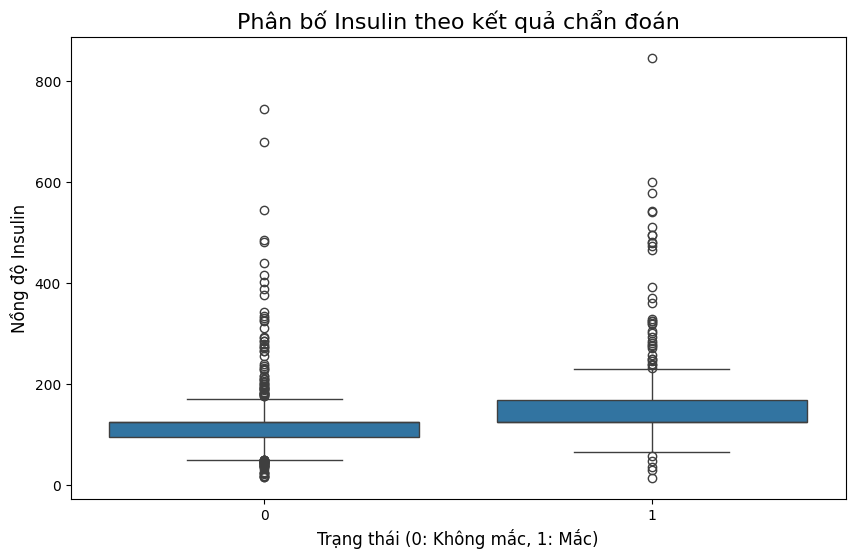

In [ ]:
# @title
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df1)
plt.title('Phân bố Insulin theo kết quả chẩn đoán', fontsize=16)
plt.xlabel('Trạng thái (0: Không mắc, 1: Mắc)', fontsize=12)
plt.ylabel('Nồng độ Insulin', fontsize=12)
plt.show()

Từ biểu đồ, không thể khẳng định có mối quan hệ tuyến tính rõ ràng giữa nồng độ Insulin và khả năng mắc bệnh tiểu đường.
Boxplot cho thấy sự khác biệt về mức trung vị và tầm phân bố giữa hai nhóm, nhưng điều này không cho thấy tính tuyến tính mà chỉ gợi ý mối liên hệ phi tuyến.
Mức Insulin ở cả hai nhóm đều có sự phân tán lớn và tồn tại nhiều ngoại lệ, khiến cho việc xác định một quan hệ tuyến tính trở nên khó khăn.

Nhóm không mắc bệnh (Outcome = 0):

* Phân bố nồng độ Insulin nằm chủ yếu trong khoảng từ ~75 đến ~175.

* Có nhiều điểm ngoại lai (outliers) với giá trị Insulin cao hơn 200, thậm chí lên tới hơn 700.

Nhóm mắc bệnh (Outcome = 1):

* Trung vị nồng độ Insulin cao hơn so với nhóm không mắc.

* Phân bố rộng hơn, phần lớn nằm trong khoảng từ ~100 đến hơn 200.

* Có nhiều outliers, bao gồm những giá trị rất cao lên tới 800+.

 **→** Nhóm mắc bệnh tiểu đường có xu hướng có mức Insulin cao hơn so với nhóm không mắc, cả về trung vị lẫn phạm vi phân bố.


### **Q5) Sự kết hợp Insulin + Glucose + BloodPressure có dự đoán tốt khả năng mắc tiểu đường không?**

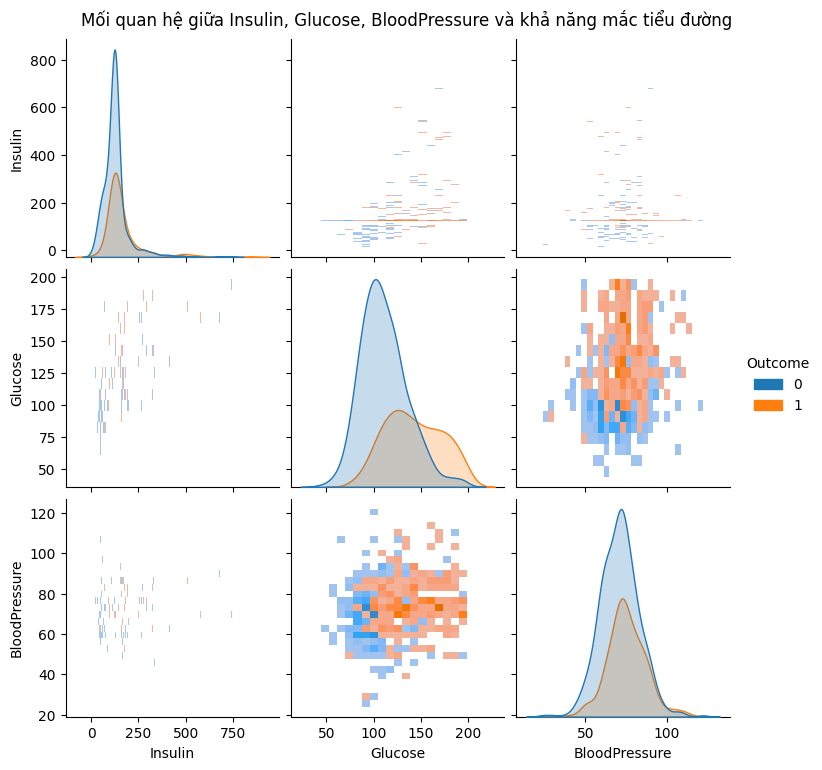

In [ ]:
# @title
sns.pairplot(df1, vars=['Insulin', 'Glucose', 'BloodPressure'], hue='Outcome', kind='hist', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa Insulin, Glucose, BloodPressure và khả năng mắc tiểu đường', y=1.02)
plt.show()

- Dựa vào biểu đồ ta thấy nếu chỉ xét 3 biến này, khả năng dự báo tiểu đường sẽ có độ chính xác ở mức trung bình, chủ yếu nhờ biến Glucose.
- Để tăng độ tin cậy, cần kết hợp thêm các yếu tố khác như BMI, Age, DiabetesPedigreeFunction - vốn được chứng minh có liên hệ mạnh với nguy cơ mắc tiểu đường.

### **Q6) Bệnh nhân BMI cao và Insulin cao có xác suất mắc bệnh vượt trội không?**

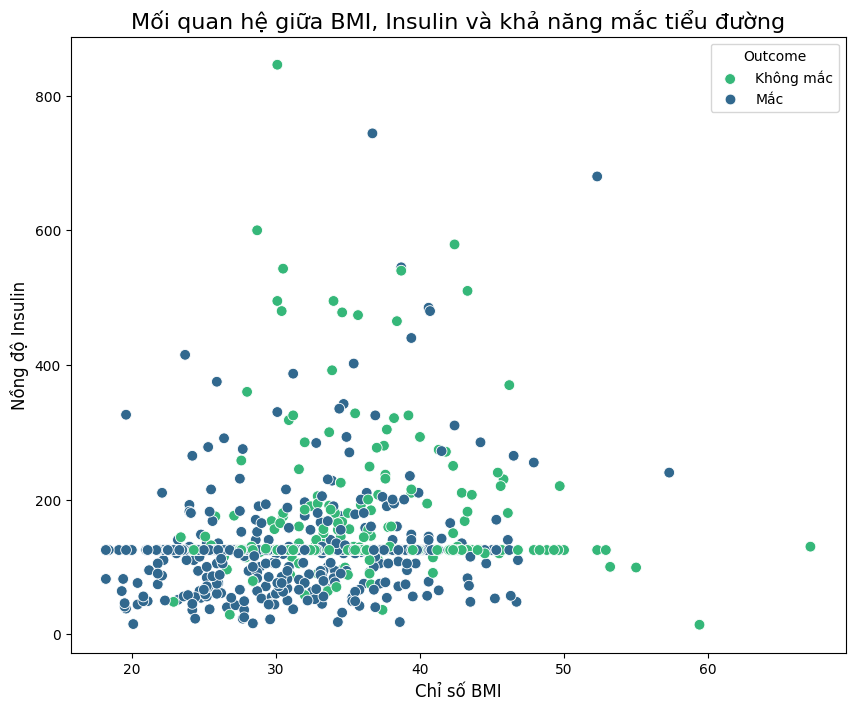

In [ ]:
# @title
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BMI', y='Insulin', hue='Outcome', data=df1, s=60, palette='viridis')
plt.title('Mối quan hệ giữa BMI, Insulin và khả năng mắc tiểu đường', fontsize=16)
plt.xlabel('Chỉ số BMI', fontsize=12)
plt.ylabel('Nồng độ Insulin', fontsize=12)
plt.legend(title='Outcome', labels=['Không mắc', 'Mắc'])
plt.show()

- Qua biểu đồ trên cho thấy được BMI cao rõ ràng là một yếu tố nguy cơ mạnh cho khả năng mắc tiểu đường.  
- Insulin cao có thể làm tăng nguy cơ, đặc biệt khi đi kèm với BMI cao, nhưng không phải yếu tố quyết định.  
→ Nhóm BMI cao + Insulin cao nhìn chung có xác suất mắc tiểu đường vượt trội so với nhóm còn lại, nhưng không hoàn toàn tuyệt đối. Để dự đoán chắc chắn hơn, cần bổ sung thêm các biến quan trọng khác như Glucose, Age, DiabetesPedigreeFunction.

## **(4) Phân tích kết quả chẩn đoán (Outcome Analysis)**

### **Q1) Tỷ lệ bệnh nhân theo kết quả chẩn đoán**

Tỷ lệ bệnh nhân theo Outcome:
Không mắc bệnh (Outcome = 0): 65.10%
Mắc bệnh (Outcome = 1): 34.90%


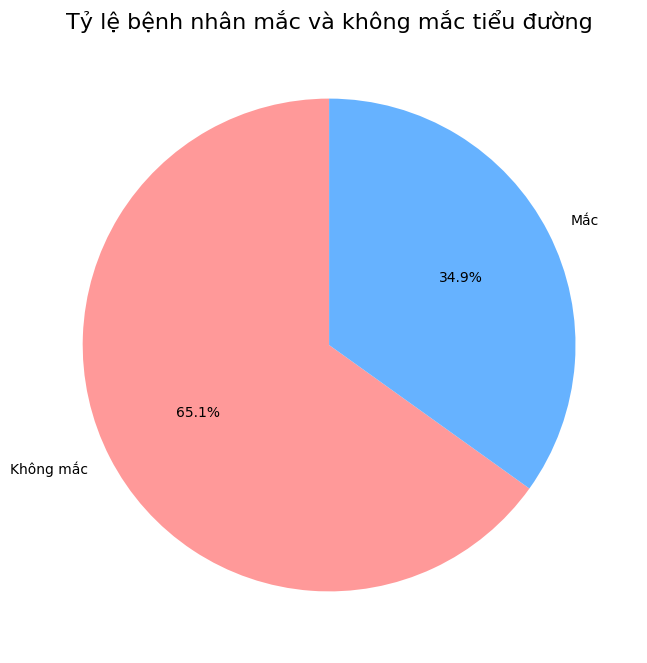

In [ ]:
# @title
# Tính tỷ lệ
outcome_counts = df1['Outcome'].value_counts()
outcome_percentages = outcome_counts / len(df1) * 100

print("Tỷ lệ bệnh nhân theo Outcome:")
print(f"Không mắc bệnh (Outcome = 0): {outcome_percentages[0]:.2f}%")
print(f"Mắc bệnh (Outcome = 1): {outcome_percentages[1]:.2f}%")

# Trực quan hóa bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(outcome_percentages, labels=['Không mắc', 'Mắc'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Tỷ lệ bệnh nhân mắc và không mắc tiểu đường', fontsize=16)
plt.show()

Dựa trên biểu đồ:

*   Tỉ lệ bệnh nhân không mắc tiểu đường (Outcome = 0): 65.1%

*   Tỉ lệ bệnh nhân mắc tiểu đường (Outcome = 1): 34.9%

Nghĩa là trong dữ liệu này, khoảng 2/3 số bệnh nhân không mắc bệnh, và 1/3 có chẩn đoán mắc bệnh tiểu đường.

### **Q2) So sánh Glucose và DiabetesPedigreeFunction giữa hai nhóm**

**Mức glucose trung bình theo nhóm**

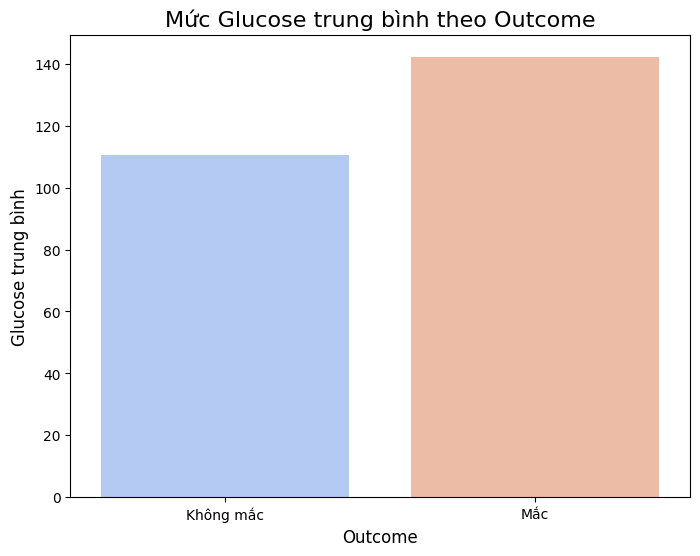

Mức Glucose trung bình theo nhóm:
    Outcome     Glucose
0        0  110.682000
1        1  142.130597


In [ ]:
# @title
# Tính giá trị trung bình của Glucose theo Outcome
glucose_by_outcome = df1.groupby('Outcome')['Glucose'].mean().reset_index()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=glucose_by_outcome, palette='coolwarm', hue='Outcome', legend=False)
plt.title('Mức Glucose trung bình theo Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Glucose trung bình', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

print("Mức Glucose trung bình theo nhóm:\n", glucose_by_outcome)

Nhìn vào biểu đồ trên, ta thấy:

* Nhóm không mắc tiểu đường: Glucose trung bình khoảng 110 mg/dL.

* Nhóm mắc tiểu đường: Glucose trung bình cao hơn rõ rệt, khoảng 142 mg/dL.

Điều này phản ánh đúng cơ sở y học: đường huyết cao là chỉ số quan trọng nhất trong việc chẩn đoán tiểu đường. Người mắc bệnh thường có Glucose trung bình cao hơn đáng kể so với người không mắc.

**Chỉ số DiabetesPedigreeFunction theo Outcome**

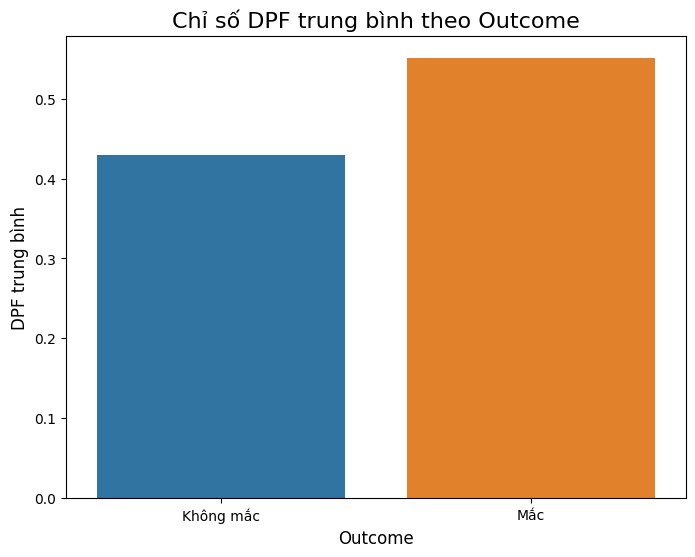


Chỉ số DiabetesPedigreeFunction trung bình theo nhóm:
    Outcome  DiabetesPedigreeFunction
0        0                  0.429734
1        1                  0.550500


In [ ]:
# @title
# Tính giá trị trung bình của DPF theo Outcome
dpf_by_outcome = df1.groupby('Outcome')['DiabetesPedigreeFunction'].mean().reset_index()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=dpf_by_outcome, palette='tab10', hue='Outcome', legend=False)
plt.title('Chỉ số DPF trung bình theo Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('DPF trung bình', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

print("\nChỉ số DiabetesPedigreeFunction trung bình theo nhóm:\n", dpf_by_outcome)

Nhìn biểu đồ, ta thấy:

* Nhóm không mắc: DPF trung bình khoảng 0.43.

* Nhóm mắc: DPF trung bình cao hơn, khoảng 0.55.

DPF đo lường yếu tố di truyền/nguy cơ gia đình. Sự khác biệt này cho thấy những người có tiền sử gia đình hoặc yếu tố di truyền liên quan đến tiểu đường có xác suất mắc bệnh cao hơn.

### **Q3) Yếu tố ảnh hưởng mạnh nhất đến nguy cơ mắc bệnh giữa tuổi, BMI, Glucose**

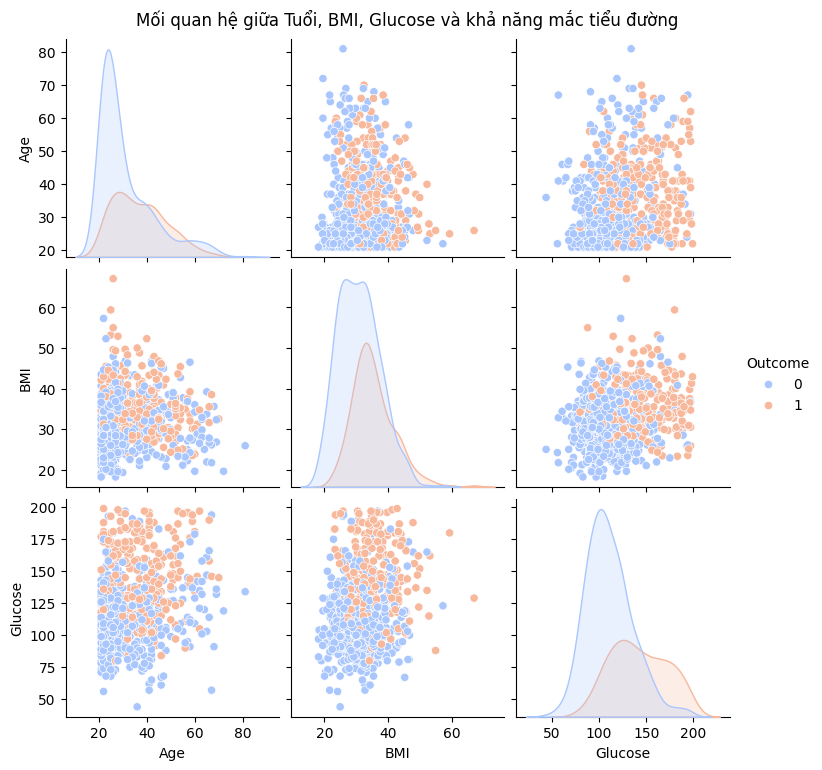

In [ ]:
# @title
# Biểu đồ cặp để phân tích đa biến
sns.pairplot(df1, vars=['Age', 'BMI', 'Glucose'], hue='Outcome', palette='coolwarm', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa Tuổi, BMI, Glucose và khả năng mắc tiểu đường', y=1.02)
plt.show()

* Glucose là yếu tố ảnh hưởng mạnh nhất đến khả năng mắc tiểu đường.

* BMI có vai trò trung bình, bổ trợ khi kết hợp với Glucose.

* Tuổi có ảnh hưởng yếu hơn, nhưng có thể làm tăng rủi ro ở nhóm lớn tuổi.

Nói cách khác, Glucose > BMI > Age về mức độ dự báo tiểu đường trong dữ liệu này.

## **(5) Phân tích tiền sử gia đình (Diabetes Pedigree Function Analysis)**

Phân tích chỉ số nguy cơ di truyền (Diabetes Pedigree Function) để hiểu rõ vai trò của yếu tố di truyền trong nguy cơ mắc bệnh tiểu đường type 2.

**Đơn biến (Univariate Analysis)**

Ở bước này, chúng ta sẽ tìm hiểu phân phối của chỉ số DiabetesPedigreeFunction trong toàn bộ dữ liệu, xác định giá trị trung bình và số lượng bệnh nhân có nguy cơ di truyền cao (chỉ số > 1). Việc này giúp nhận diện mức độ phổ biến của nguy cơ di truyền trong cộng đồng người Pima.

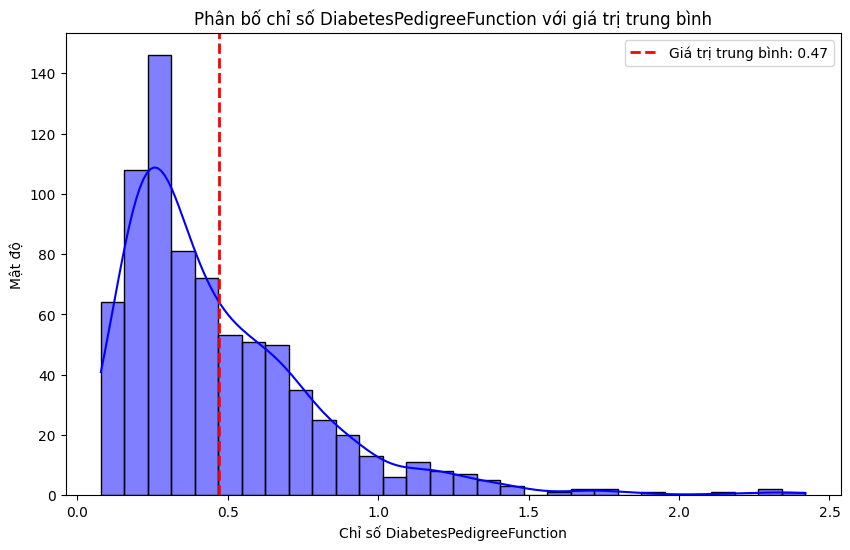

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá trị trung bình của cột DiabetesPedigreeFunction
avg_pedigree = df1['DiabetesPedigreeFunction'].mean()

# Vẽ biểu đồ KDE (ước tính mật độ hạt nhân) để xem phân bố của chỉ số
plt.figure(figsize=(10, 6))
sns.histplot(df1['DiabetesPedigreeFunction'], kde=True, color='blue', bins=30)

# Vẽ một đường thẳng đứng tại giá trị trung bình
plt.axvline(avg_pedigree, color='red', linestyle='--', linewidth=2, label=f'Giá trị trung bình: {avg_pedigree:.2f}')

plt.title('Phân bố chỉ số DiabetesPedigreeFunction với giá trị trung bình')
plt.xlabel('Chỉ số DiabetesPedigreeFunction')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

Biểu đồ phân phối chỉ số DiabetesPedigreeFunction cho thấy phần lớn bệnh nhân có chỉ số nguy cơ di truyền thấp (dưới giá trị trung bình khoảng 0.47).
Số lượng bệnh nhân có chỉ số cao (> 1) là khá ít, cho thấy nguy cơ di truyền cao không phổ biến trong cộng đồng người Pima này.

Phân phối có xu hướng lệch phải, tập trung nhiều ở các giá trị thấp và giảm dần ở các giá trị cao. Điều này phản ánh đa số bệnh nhân có nguy cơ di truyền thấp, nhưng vẫn tồn tại một nhóm nhỏ có nguy cơ cao cần được chú ý trong các phân tích tiếp theo.

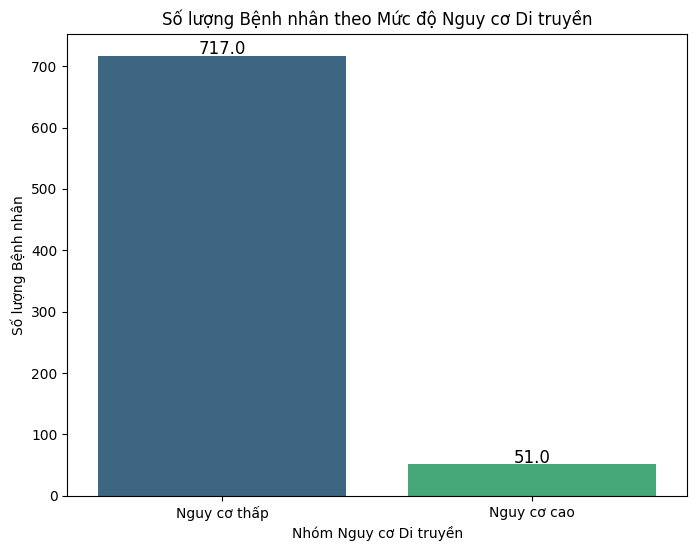

In [ ]:
# Tạo một cột phân loại mới: 'Nguy cơ Di truyền'
# Phân loại bệnh nhân thành 2 nhóm: "Nguy cơ cao" (DPF > 1) và "Nguy cơ thấp" (DPF <= 1)
df1['Genetic_Risk'] = df1['DiabetesPedigreeFunction'].apply(lambda x: 'Nguy cơ cao' if x > 1 else 'Nguy cơ thấp')

# Vẽ biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(8, 6))
sns.countplot(x='Genetic_Risk', data=df1, hue='Genetic_Risk', palette='viridis', legend=False)
plt.title('Số lượng Bệnh nhân theo Mức độ Nguy cơ Di truyền')
plt.xlabel('Nhóm Nguy cơ Di truyền')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột cho thấy phần lớn bệnh nhân trong bộ dữ liệu thuộc nhóm "Nguy cơ thấp" (chỉ số Diabetes Pedigree Function ≤ 1), trong khi số lượng bệnh nhân có "Nguy cơ cao" (chỉ số > 1) chiếm tỷ lệ nhỏ hơn.

Điều này cho thấy yếu tố di truyền cao không phổ biến trong cộng đồng người Pima, nhưng vẫn có một nhóm nhỏ bệnh nhân có nguy cơ di truyền nổi bật.

Việc nhận diện nhóm nguy cơ cao giúp tập trung các biện pháp phòng ngừa và theo dõi sát hơn đối với những cá nhân này.

**Nhị biến (Bivariate Analysis)**

Ở bước phân tích nhị biến này, chúng ta sẽ đi sâu hơn để khám phá mối quan hệ giữa chỉ số Diabetes Pedigree Function (DPF) và biến mục tiêu 'Outcome' (kết quả chẩn đoán tiểu đường: 0 - Không mắc, 1 - Mắc). Câu hỏi nghiên cứu đặt ra là: **Liệu chỉ số DPF có khác biệt đáng kể giữa nhóm bệnh nhân mắc và không mắc bệnh tiểu đường hay không?**

Để trả lời câu hỏi này, ta sẽ sử dụng biểu đồ violin plot. Biểu đồ này là lựa chọn tốt vì nó không chỉ hiển thị phân phối (mật độ) của chỉ số DPF cho từng nhóm (Outcome = 0 và Outcome = 1) mà còn cho thấy các thống kê tóm tắt như trung vị và tứ phân vị thông qua các đường kẻ bên trong. Điều này giúp trực quan so sánh hình dạng phân phối, xu hướng trung tâm và sự biến động của DPF giữa hai nhóm.

 Kỳ vọng sẽ thấy rằng nhóm bệnh nhân mắc tiểu đường (Outcome = 1) sẽ có xu hướng có chỉ số DPF cao hơn so với nhóm không mắc tiểu đường (Outcome = 0), phản ánh vai trò của tiền sử gia đình như một yếu tố nguy cơ.

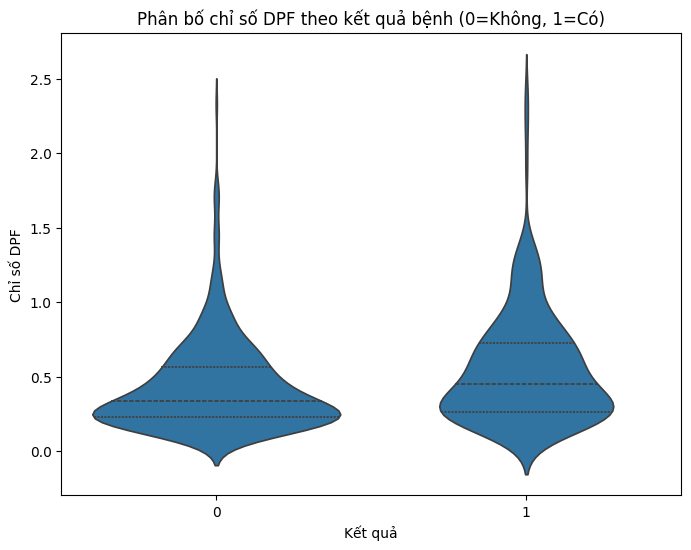

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame 'df' sau khi làm sạch
# (đã xử lý giá trị 0 và dữ liệu thiếu)

plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df1, inner='quartile')
plt.title('Phân bố chỉ số DPF theo kết quả bệnh (0=Không, 1=Có)')
plt.xlabel('Kết quả')
plt.ylabel('Chỉ số DPF')
plt.show()

Quan sát biểu đồ violin plot, chúng ta có thể nhận thấy sự khác biệt trong phân phối chỉ số Diabetes Pedigree Function (DPF) giữa hai nhóm: nhóm không mắc tiểu đường (Outcome = 0) và nhóm mắc tiểu đường (Outcome = 1).

- **Nhóm không mắc tiểu đường (Outcome = 0):** Biểu đồ violin cho thấy phân phối DPF tập trung chủ yếu ở các giá trị thấp hơn. Hình dạng của violin hẹp ở phần giá trị cao, cho thấy ít bệnh nhân trong nhóm này có chỉ số DPF cao.
- **Nhóm mắc tiểu đường (Outcome = 1):** Biểu đồ violin cho thấy phân phối DPF có xu hướng trải rộng hơn và có mật độ đáng kể ở các giá trị DPF cao hơn so với nhóm không mắc tiểu đường. Phần rộng hơn của violin ở các giá trị DPF cao hơn cho thấy có nhiều bệnh nhân mắc tiểu đường có tiền sử gia đình về bệnh này.

**Nhận xét:**

Biểu đồ này củng cố nhận định rằng chỉ số Diabetes Pedigree Function có mối liên hệ với nguy cơ mắc bệnh tiểu đường. Những bệnh nhân có chỉ số DPF cao hơn có xu hướng nằm trong nhóm mắc tiểu đường. Điều này cho thấy tiền sử gia đình đóng vai trò là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường type 2 trong tập dữ liệu này.

**Đa biến (Multivariate Analysis)**

Phân tích đa biến là việc khám phá mối quan hệ phức tạp giữa nhiều biến cùng một lúc để hiểu cách chúng tương tác và ảnh hưởng đến kết quả cuối cùng.

Trong bộ dữ liệu Pima, phân tích đa biến giúp chúng ta:

+ Hiểu cách các yếu tố như DPF, BMI, Glucose và Tuổi kết hợp với nhau để dự đoán khả năng mắc bệnh tiểu đường.

+ Nhận diện các tương quan hoặc tương tác tiềm ẩn giữa các yếu tố.

+ Xây dựng nền tảng cho các mô hình dự đoán chính xác hơn, vì nó cung cấp cái nhìn toàn diện hơn về các yếu tố nguy cơ.

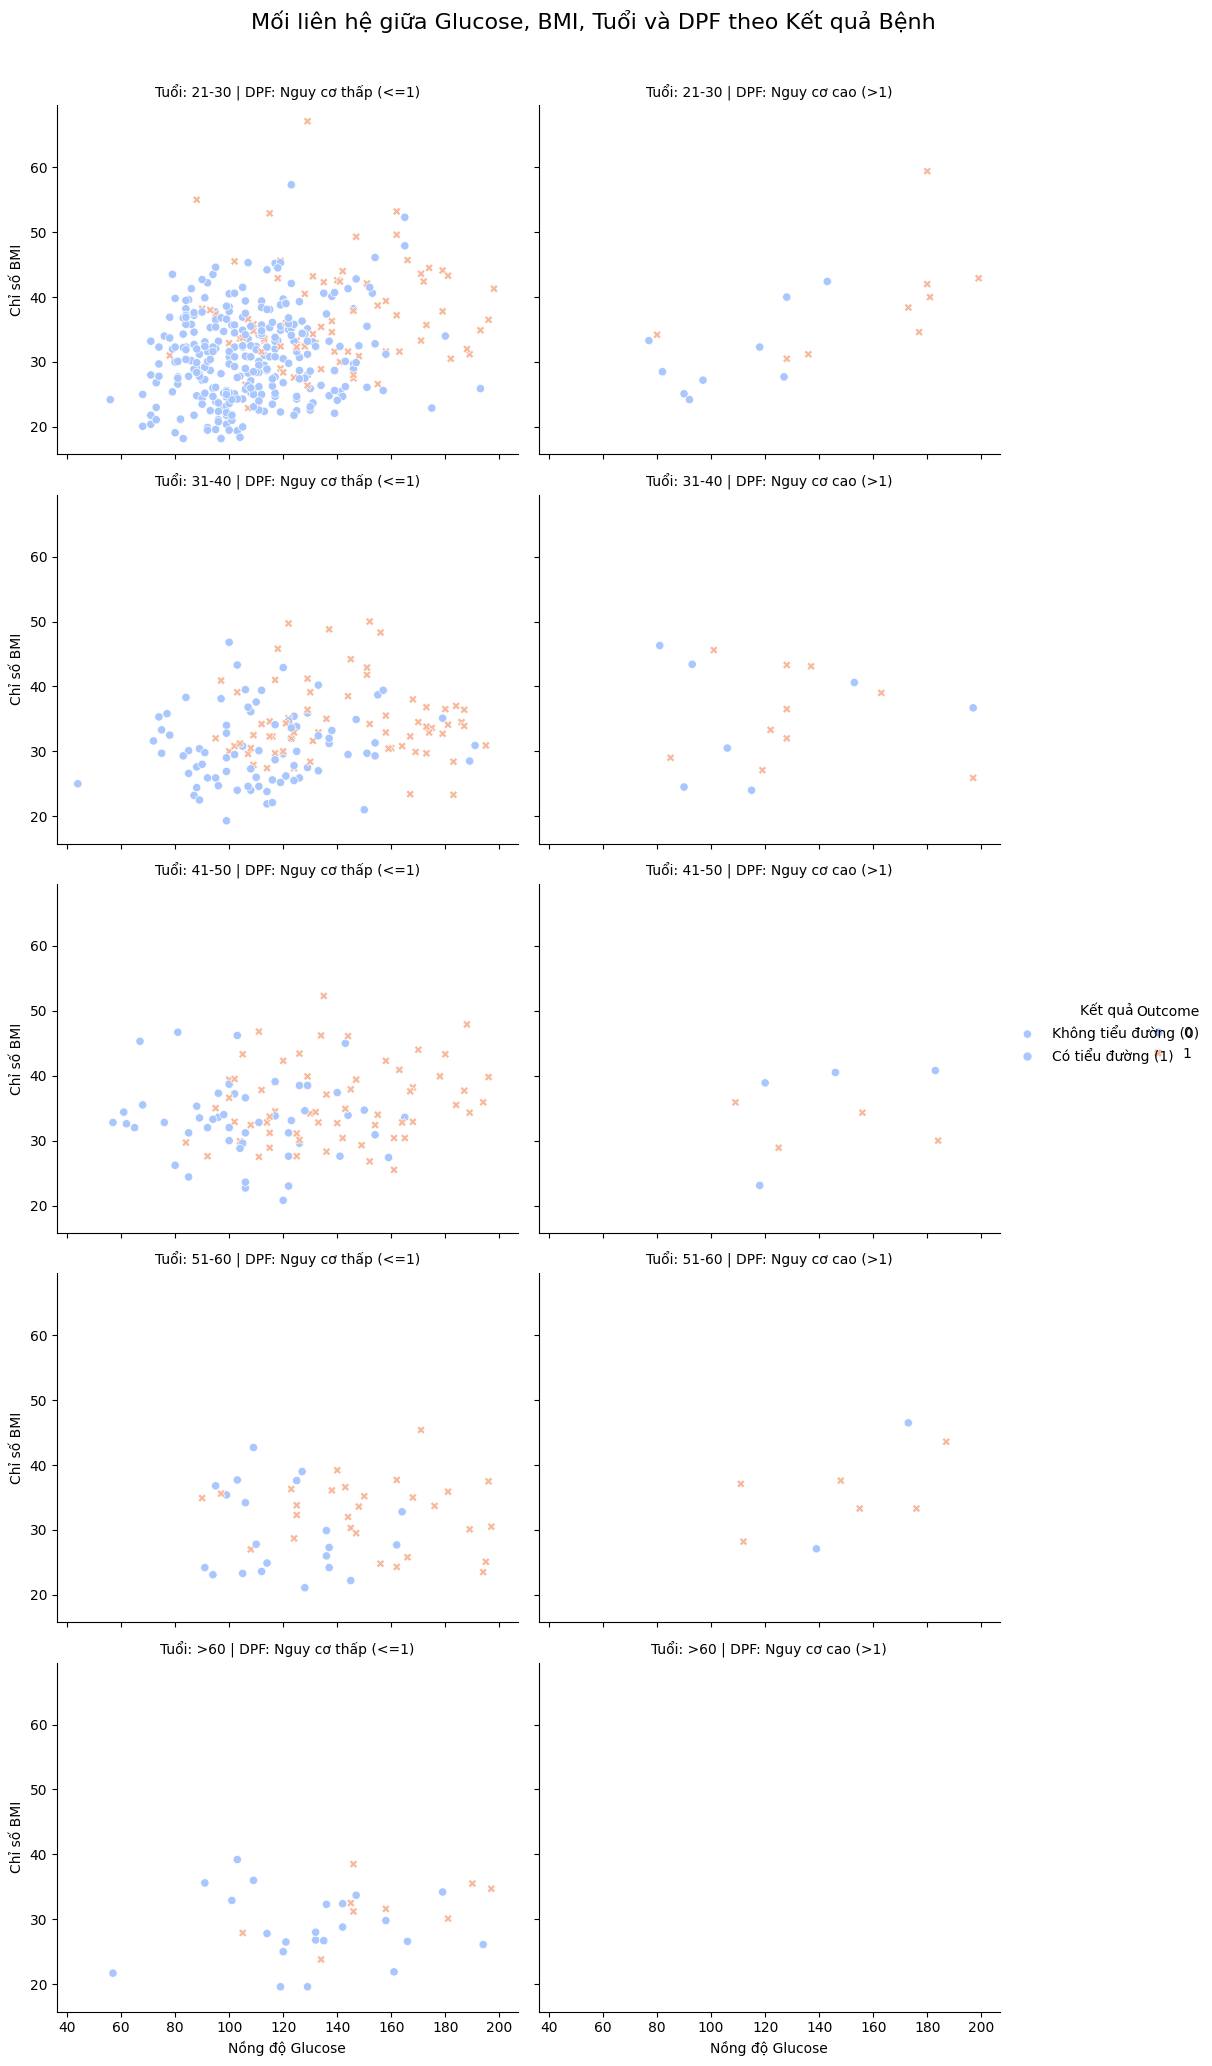

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Phân loại Age và DPF thành các nhóm để dễ trực quan
# Cập nhật bin cho Age để phân phối đều hơn giữa các nhóm
bins_age = [df1['Age'].min(), 30, 40, 50, 60, df1['Age'].max()]
labels_age = ['21-30', '31-40', '41-50', '51-60', '>60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins_age, labels=labels_age, right=False, include_lowest=True)

# Giữ nguyên phân loại DPF
df1['DPF_Risk'] = df1['DiabetesPedigreeFunction'].apply(lambda x: 'Nguy cơ cao (>1)' if x > 1 else 'Nguy cơ thấp (<=1)')

# Bước 2: Tạo biểu đồ tổ hợp với bố cục hàng dọc
# Tăng kích thước hình để dễ nhìn hơn
g = sns.relplot(
    data=df1,
    x='Glucose',
    y='BMI',
    row='Age_Group',
    col='DPF_Risk',
    hue='Outcome',
    palette='coolwarm', # Palette dễ phân biệt 0 và 1
    style='Outcome',
    height=4, # Chiều cao của mỗi subplot
    aspect=1.2 # Tỷ lệ khung hình của mỗi subplot
)

# Đặt tiêu đề cho các subplot và trục
g.fig.suptitle('Mối liên hệ giữa Glucose, BMI, Tuổi và DPF theo Kết quả Bệnh', fontsize=16, y=1.03) # y điều chỉnh vị trí tiêu đề

# Cải thiện nhãn trục cho từng subplot
g.set_titles("Tuổi: {row_name} | DPF: {col_name}")
g.set_axis_labels("Nồng độ Glucose", "Chỉ số BMI")

# Cải thiện nhãn chú giải (legend)
g.add_legend(title='Kết quả', labels=['Không tiểu đường (0)', 'Có tiểu đường (1)'])


plt.show()

Từ các biểu đồ trên, chúng ta thấy rằng nguy cơ mắc bệnh tiểu đường chịu ảnh hưởng phức tạp bởi sự kết hợp của nhiều yếu tố.

*   **Glucose là chỉ báo mạnh mẽ nhất:** Biểu đồ mật độ (KDE) cho thấy sự phân tách rõ rệt, với nhóm mắc tiểu đường có nồng độ Glucose cao hơn hẳn nhóm không mắc bệnh. Điều này khẳng định Glucose là yếu tố dự báo cực kỳ quan trọng.
*   **BMI và Tuổi tác cũng đóng vai trò lớn:** Tương tự Glucose, BMI và Tuổi cũng cao hơn đáng kể ở nhóm mắc tiểu đường.
*   **Ảnh hưởng kết hợp của DPF, BMI, Glucose và Age:**
    *   Biểu đồ trên minh họa rõ nhất rằng nguy cơ mắc bệnh tiểu đường tăng mạnh khi các yếu tố **Glucose cao, BMI cao và Tuổi cao** cùng xuất hiện.
    *   Chỉ số nguy cơ di truyền (DPF), mặc dù không nổi bật khi đứng một mình nhưng vẫn **góp phần làm tăng nguy cơ**, đặc biệt là khi kết hợp với Glucose, BMI và Tuổi cao. Nó có thể là yếu tố "đẩy" nguy cơ lên cao hơn khi các yếu tố khác đã ở mức đáng ngại.

**Kết luận chung:** Bệnh tiểu đường trong tập dữ liệu này chủ yếu được dự báo bởi sự kết hợp của **Glucose cao, BMI cao và Tuổi cao**. Chỉ số **Diabetes Pedigree Function (DPF)** cũng là một yếu tố quan trọng, làm tăng thêm nguy cơ, đặc biệt khi các yếu tố khác đã hiện diện. Việc xem xét đồng thời cả 4 yếu tố này cung cấp bức tranh toàn diện nhất về nguy cơ mắc bệnh.

## **(6) Phân tích theo nhóm (Cohort Analysis)**

Ở phần "Phân tích theo nhóm" này, chúng ta sẽ đi sâu vào việc so sánh các đặc điểm và tỷ lệ mắc bệnh giữa các nhóm bệnh nhân khác nhau trong tập dữ liệu.

Mục tiêu chính là để:

*   **Khám phá sự khác biệt:** Xem xét các chỉ số y tế và tỷ lệ mắc bệnh tiểu đường có sự khác biệt đáng kể giữa các nhóm được định nghĩa dựa trên các yếu tố như Tuổi tác, Chỉ số BMI, hoặc các yếu tố khác hay không.
*   **Nhận diện nhóm nguy cơ cao:** Xác định những nhóm bệnh nhân cụ thể có tỷ lệ mắc bệnh tiểu đường cao hơn so với các nhóm khác.

Chúng ta sẽ thực hiện điều này bằng cách phân chia dữ liệu thành các nhóm dựa trên các biến phân loại hoặc bằng cách tạo các nhóm từ biến liên tục (ví dụ: nhóm tuổi, nhóm BMI) và sau đó sử dụng các biểu đồ (như biểu đồ cột, boxplot) và thống kê mô tả để so sánh các đặc điểm và tỷ lệ Outcome giữa các nhóm này.



---



Ở bước này, chúng ta sẽ xem xét các đặc điểm của từng nhóm riêng lẻ. Cụ thể, tập trung vào việc mô tả phân bố hoặc số lượng bệnh nhân dựa trên các yếu tố phân loại hoặc nhóm đã tạo, ví dụ như:

*   **Phân bố theo nhóm tuổi:** Tỷ lệ bệnh nhân trẻ (<30 tuổi) so với nhóm lớn tuổi (>50 tuổi).
*   **Phân bố theo nhóm BMI:** Số lượng bệnh nhân trong các nhóm thiếu cân, bình thường, thừa cân và béo phì.
*   **Phân bố theo số lần mang thai:** Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần).

Mục đích là để có cái nhìn tổng quan về cấu trúc nhân khẩu học và các đặc điểm cơ bản của dữ liệu khi được chia theo nhóm.

### **Q1) Tỷ lệ bệnh nhân trẻ (<30 tuổi) vs. nhóm lớn tuổi (>50 tuổi)**

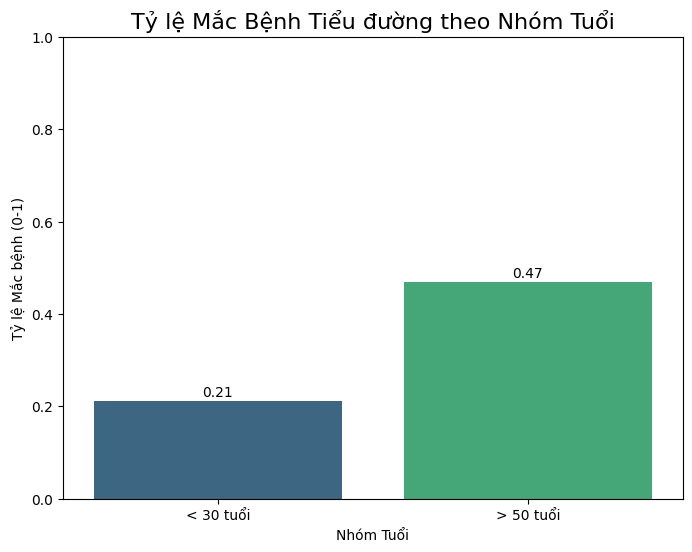

In [ ]:
# Bước 1: Lọc dữ liệu thành hai nhóm tuổi
df_young = df1[df1['Age'] < 30]
df_old = df1[df1['Age'] > 50]

# Bước 2: Tính tỷ lệ mắc bệnh (Outcome) cho từng nhóm
diabetes_rate_young = df_young['Outcome'].mean()
diabetes_rate_old = df_old['Outcome'].mean()

# Bước 3: Tạo DataFrame mới để vẽ biểu đồ
rate_df = pd.DataFrame({
    'Nhóm Tuổi': ['< 30 tuổi', '> 50 tuổi'],
    'Tỷ lệ Mắc bệnh': [diabetes_rate_young, diabetes_rate_old]
})

# Bước 4: Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Nhóm Tuổi', y='Tỷ lệ Mắc bệnh', data=rate_df, palette='viridis', hue='Nhóm Tuổi', legend=False)
plt.title('Tỷ lệ Mắc Bệnh Tiểu đường theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Tỷ lệ Mắc bệnh (0-1)')

# Thêm nhãn giá trị trên mỗi cột
for index, row in rate_df.iterrows():
    plt.text(index, row['Tỷ lệ Mắc bệnh'] + 0.01, f'{row["Tỷ lệ Mắc bệnh"]:.2f}',
             color='black', ha='center')

plt.ylim(0, 1)
plt.show()

Biểu đồ cột này so sánh tỷ lệ mắc bệnh tiểu đường (Outcome = 1) giữa nhóm bệnh nhân trẻ (< 30 tuổi) và nhóm bệnh nhân lớn tuổi (> 50 tuổi).

*   **Nhóm trẻ (< 30 tuổi):** Tỷ lệ mắc bệnh tiểu đường là khoảng 0.21 (hoặc 21%).
*   **Nhóm lớn tuổi (> 50 tuổi):** Tỷ lệ mắc bệnh tiểu đường là khoảng 0.47 (hoặc 47%).

Từ đó ta thấy có sự khác biệt rõ rệt về tỷ lệ mắc bệnh tiểu đường giữa hai nhóm tuổi này. Nhóm bệnh nhân lớn tuổi (> 50 tuổi) có tỷ lệ mắc bệnh tiểu đường cao hơn đáng kể so với nhóm bệnh nhân trẻ (< 30 tuổi).

**Kết luận:**

Biểu đồ này củng cố nhận định rằng **tuổi tác là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường type 2** trong tập dữ liệu này. Bệnh nhân càng lớn tuổi thì khả năng mắc bệnh tiểu đường càng cao. Điều này phù hợp với hiểu biết chung về bệnh tiểu đường type 2, vốn thường phổ biến hơn ở người lớn tuổi.

### **Q2) Tỷ lệ bệnh nhân theo nhóm BMI: thiếu cân, bình thường, thừa cân, béo phì.**

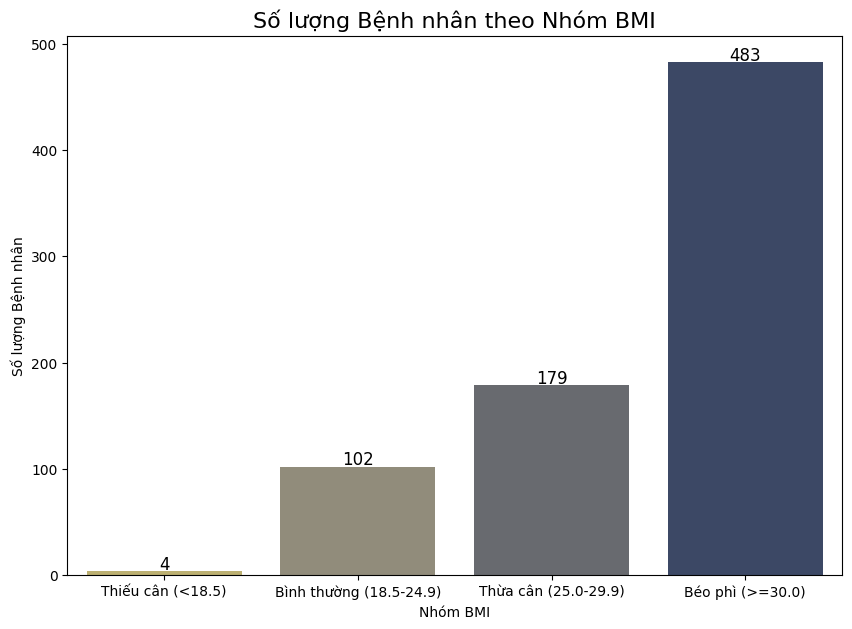

In [ ]:
# Bước 1: Phân loại BMI thành các nhóm
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Thiếu cân (<18.5)'
    elif 18.5 <= bmi < 25.0:
        return 'Bình thường (18.5-24.9)'
    elif 25.0 <= bmi < 30.0:
        return 'Thừa cân (25.0-29.9)'
    else:
        return 'Béo phì (>=30.0)'

df1['BMI_Category'] = df1['BMI'].apply(categorize_bmi)

# Bước 2: Sắp xếp các nhóm để biểu đồ hiển thị đúng thứ tự
bmi_order = ['Thiếu cân (<18.5)', 'Bình thường (18.5-24.9)', 'Thừa cân (25.0-29.9)', 'Béo phì (>=30.0)']

# Bước 3: Tạo biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(10, 7))
sns.countplot(x='BMI_Category', data=df1, order=bmi_order, palette='cividis', hue='BMI_Category', legend=False)

plt.title('Số lượng Bệnh nhân theo Nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột này hiển thị số lượng bệnh nhân trong từng nhóm BMI (Thiếu cân, Bình thường, Thừa cân, Béo phì).

*   **Nhóm "Béo phì" (>=30.0) chiếm số lượng lớn nhất:** Đây là nhóm có số lượng bệnh nhân đông đảo nhất trong tập dữ liệu.
*   **Nhóm "Bình thường" (18.5-24.9) và "Thừa cân" (25.0-29.9) có số lượng tương đương và đứng thứ hai:** Số lượng bệnh nhân trong hai nhóm này gần bằng nhau và ít hơn đáng kể so với nhóm béo phì.
*   **Nhóm "Thiếu cân" (<18.5) có số lượng ít nhất:** Nhóm này chỉ chiếm một phần rất nhỏ trong tổng số bệnh nhân.

Phân tích này chỉ ra rằng phần lớn bệnh nhân trong tập dữ liệu này đều bị thừa cân hoặc béo phì. Đây là một phát hiện quan trọng thể hiện rằng chỉ số BMI cao là một yếu tố nguy cơ hàng đầu gây ra bệnh tiểu đường.

### **Q3) Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần).**

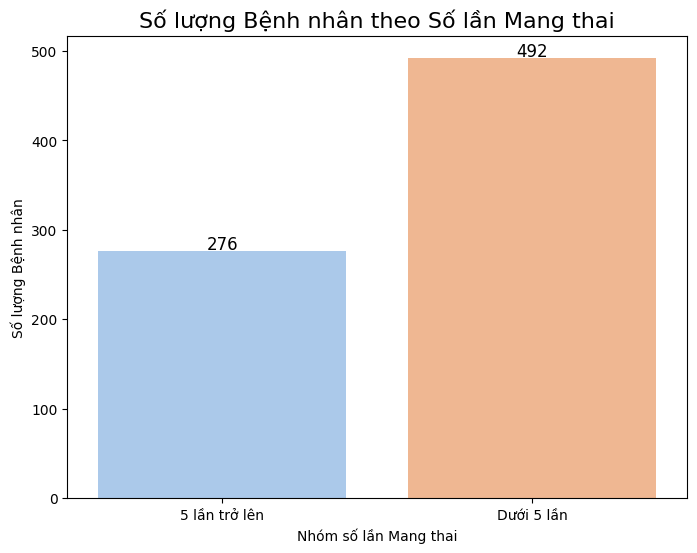

In [ ]:
# Bước 1: Phân loại bệnh nhân thành hai nhóm
df1['High_Pregnancies'] = df1['Pregnancies'].apply(lambda x: '5 lần trở lên' if x >= 5 else 'Dưới 5 lần')

# Bước 2: Tạo biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(8, 6))
sns.countplot(x='High_Pregnancies', data=df1, palette='pastel', hue='High_Pregnancies', legend=False)

plt.title('Số lượng Bệnh nhân theo Số lần Mang thai', fontsize=16)
plt.xlabel('Nhóm số lần Mang thai')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột này cung cấp một cái nhìn tổng quan về sự phân bố số lần mang thai của các bệnh nhân trong tập dữ liệu. Nó giúp chúng ta hiểu được đặc điểm sinh sản của nhóm đối tượng này.

+ **Phần lớn mang thai dưới 5 lần:** Biểu đồ cho thấy nhóm "Dưới 5 lần" có số lượng bệnh nhân cao hơn đáng kể (492 bệnh nhân) so với nhóm "5 lần trở lên" (276 bệnh nhân). Điều này cho thấy phần lớn đối tượng trong tập dữ liệu đã trải qua dưới 5 lần mang thai.

+ **Nhóm mang thai nhiều lần vẫn đáng kể:** Mặc dù ít hơn, số lượng bệnh nhân mang thai từ 5 lần trở lên vẫn chiếm một tỷ lệ đáng kể. Điều này cho thấy nhóm này cũng là một phần quan trọng trong dữ liệu, cần được phân tích sâu hơn.

Phân tích này chỉ ra rằng mặc dù phần lớn bệnh nhân có số lần mang thai dưới 5 lần, nhóm có số lần mang thai nhiều hơn vẫn chiếm một phần không nhỏ. Đây là một phát hiện quan trọng thể hiện số lần mang thai là một yếu tố có liên quan đến bệnh tiểu đường.



---



Ở bước này, chúng ta sẽ mở rộng phân tích bằng cách xem xét mối quan hệ giữa **hai biến** cùng một lúc. Mục tiêu là để khám phá xem liệu có sự khác biệt đáng kể về kết quả bệnh tiểu đường (Outcome) dựa trên các nhóm được định nghĩa bởi các biến khác (như Tuổi, BMI, Số lần Mang thai) hay không.

Cụ thể, chúng ta sẽ khám phá các câu hỏi như:

*   Tỷ lệ mắc bệnh tiểu đường có khác biệt giữa nhóm tuổi trẻ và nhóm lớn tuổi không?
*   Tỷ lệ mắc bệnh tiểu đường có khác biệt giữa các nhóm BMI (Thiếu cân, Bình thường, Thừa cân, Béo phì) không?
*   Bệnh nhân mang thai nhiều lần (≥5 lần) có khác biệt về các chỉ số sức khỏe (Glucose, Insulin, BMI) so với nhóm khác không?

Việc trả lời những câu hỏi này giúp chúng ta hiểu rõ hơn về các yếu tố nguy cơ liên quan đến bệnh tiểu đường khi xem xét chúng theo từng cặp mối quan hệ.

### **Q4) Nhóm trẻ và nhóm lớn tuổi: tỷ lệ mắc tiểu đường khác nhau thế nào?**

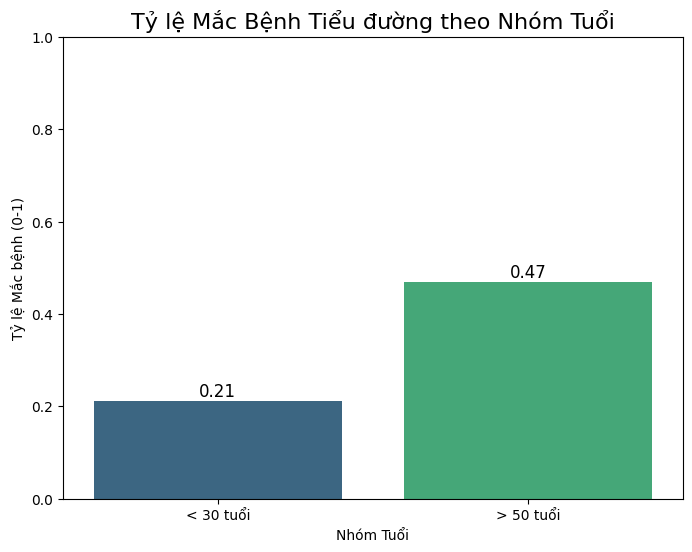

In [ ]:
# Bước 1: Lọc dữ liệu thành hai nhóm tuổi
df1_young = df1[df1['Age'] < 30]
df1_old = df1[df1['Age'] > 50]

# Bước 2: Tính tỷ lệ mắc bệnh (Outcome) cho từng nhóm
diabetes_rate_young = df1_young['Outcome'].mean()
diabetes_rate_old = df1_old['Outcome'].mean()

# Bước 3: Tạo DataFrame mới để vẽ biểu đồ
rate_df = pd.DataFrame({
    'Nhóm Tuổi': ['< 30 tuổi', '> 50 tuổi'],
    'Tỷ lệ Mắc bệnh': [diabetes_rate_young, diabetes_rate_old]
})

# Bước 4: Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Nhóm Tuổi', y='Tỷ lệ Mắc bệnh', data=rate_df, palette='viridis', hue='Nhóm Tuổi', legend=False)
plt.title('Tỷ lệ Mắc Bệnh Tiểu đường theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Tỷ lệ Mắc bệnh (0-1)')

# Thêm nhãn giá trị trên mỗi cột
for index, row in rate_df.iterrows():
    plt.text(index, row['Tỷ lệ Mắc bệnh'] + 0.01, f'{row["Tỷ lệ Mắc bệnh"]:.2f}',
             color='black', ha='center', fontsize=12)

plt.ylim(0, 1)
plt.show()

Biểu đồ cột này cung cấp một cái nhìn trực quan và mạnh mẽ về mối liên hệ giữa tuổi tác và tỷ lệ mắc bệnh tiểu đường. Nó cho thấy tỷ lệ mắc bệnh ở nhóm trên 50 tuổi là 0.47, cao hơn gấp đôi so với nhóm dưới 30 tuổi, chỉ có tỷ lệ là 0.21.

Sự chênh lệch rõ rệt này không chỉ xác nhận rằng tuổi tác là một yếu tố nguy cơ đáng kể mà còn nhấn mạnh tầm quan trọng của việc theo dõi sức khỏe thường xuyên, đặc biệt với những người ở độ tuổi trên 50, vì họ có nguy cơ mắc bệnh cao hơn nhiều.

Kết luận, tuổi tác đóng vai trò then chốt trong việc xác định nguy cơ mắc bệnh tiểu đường type 2, và phát hiện này phù hợp với kiến thức y học và là cơ sở quan trọng cho các phân tích sâu hơn.

### **Q5) Tỷ lệ mắc bệnh theo nhóm BMI**

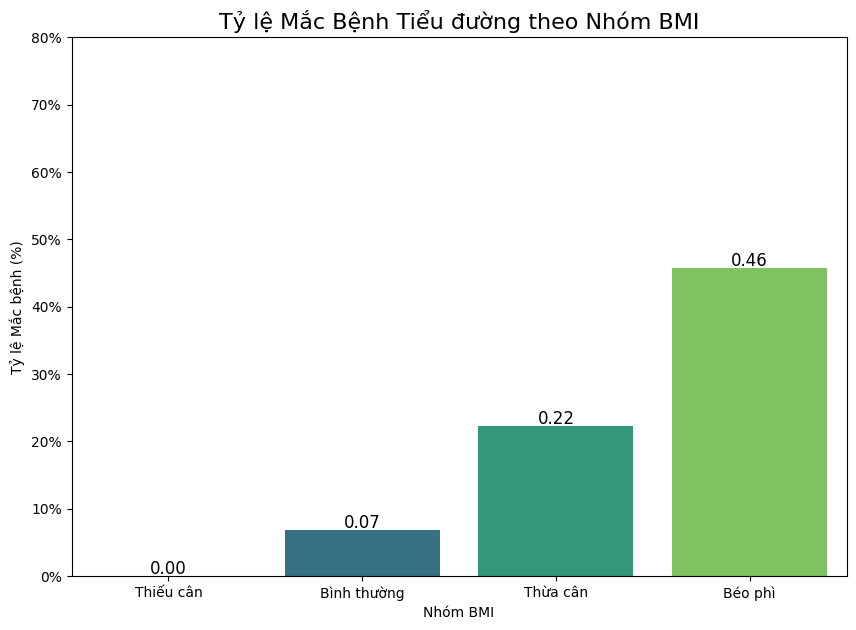

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Giả sử bạn đã có DataFrame 'df1' sau khi làm sạch

# Bước 1: Phân loại BMI thành các nhóm
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Thiếu cân'
    elif 18.5 <= bmi < 25.0:
        return 'Bình thường'
    elif 25.0 <= bmi < 30.0:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(categorize_bmi)

# Bước 2: Tính tỷ lệ mắc bệnh (Outcome) cho từng nhóm
bmi_diabetes_rate = df1.groupby('BMI_Category')['Outcome'].mean().reset_index()

# Bước 3: Sắp xếp các nhóm để biểu đồ hiển thị đúng thứ tự
bmi_order = ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì']
bmi_diabetes_rate['BMI_Category'] = pd.Categorical(bmi_diabetes_rate['BMI_Category'], categories=bmi_order, ordered=True)
bmi_diabetes_rate = bmi_diabetes_rate.sort_values('BMI_Category')

# Bước 4: Tạo biểu đồ cột
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='BMI_Category', y='Outcome', data=bmi_diabetes_rate, palette='viridis', hue='BMI_Category', legend=False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Tỷ lệ Mắc Bệnh Tiểu đường theo Nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI')
plt.ylabel('Tỷ lệ Mắc bệnh (%)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.ylim(0, 0.8)
plt.show()

Biểu đồ cột này hiển thị tỷ lệ mắc bệnh tiểu đường (Outcome = 1) trong từng nhóm Chỉ số khối cơ thể (BMI): Thiếu cân, Bình thường, Thừa cân và Béo phì.

*   **Nhóm Thiếu cân:** Tỷ lệ mắc bệnh rất thấp (0%).
*   **Nhóm Bình thường:** Tỷ lệ mắc bệnh còn thấp (khoảng 7%).
*   **Nhóm Thừa cân:** Tỷ lệ mắc bệnh tăng lên đáng kể (khoảng 22%).
*   **Nhóm Béo phì:** Tỷ lệ mắc bệnh cao nhất (khoảng 46%).

Biểu đồ cho thấy một mối quan hệ rất rõ ràng và mạnh mẽ: **Tỷ lệ mắc bệnh tiểu đường tăng tuyến tính với chỉ số BMI**. Khi BMI tăng từ mức "Bình thường" lên "Thừa cân" và đặc biệt là "Béo phì", nguy cơ mắc bệnh tiểu đường cũng tăng theo cấp số nhân. Nhóm "Béo phì" có tỷ lệ mắc bệnh cao hơn gấp đôi so với nhóm "Thừa cân".

**Kết luận:**

Từ biểu đồ này, có thể kết luận rằng **Chỉ số khối cơ thể (BMI) là một trong những yếu tố nguy cơ mạnh mẽ nhất đối với bệnh tiểu đường type 2** trong tập dữ liệu này. Béo phì không chỉ là một yếu tố liên quan mà còn là một chỉ báo đáng tin cậy về khả năng mắc bệnh. Việc kiểm soát cân nặng và duy trì BMI ở mức bình thường là cực kỳ quan trọng trong việc phòng ngừa bệnh tiểu đường.

### **Q6) Bệnh nhân mang thai nhiều lần (≥5 lần) có khác biệt về Glucose, Insulin, BMI so với nhóm khác.**

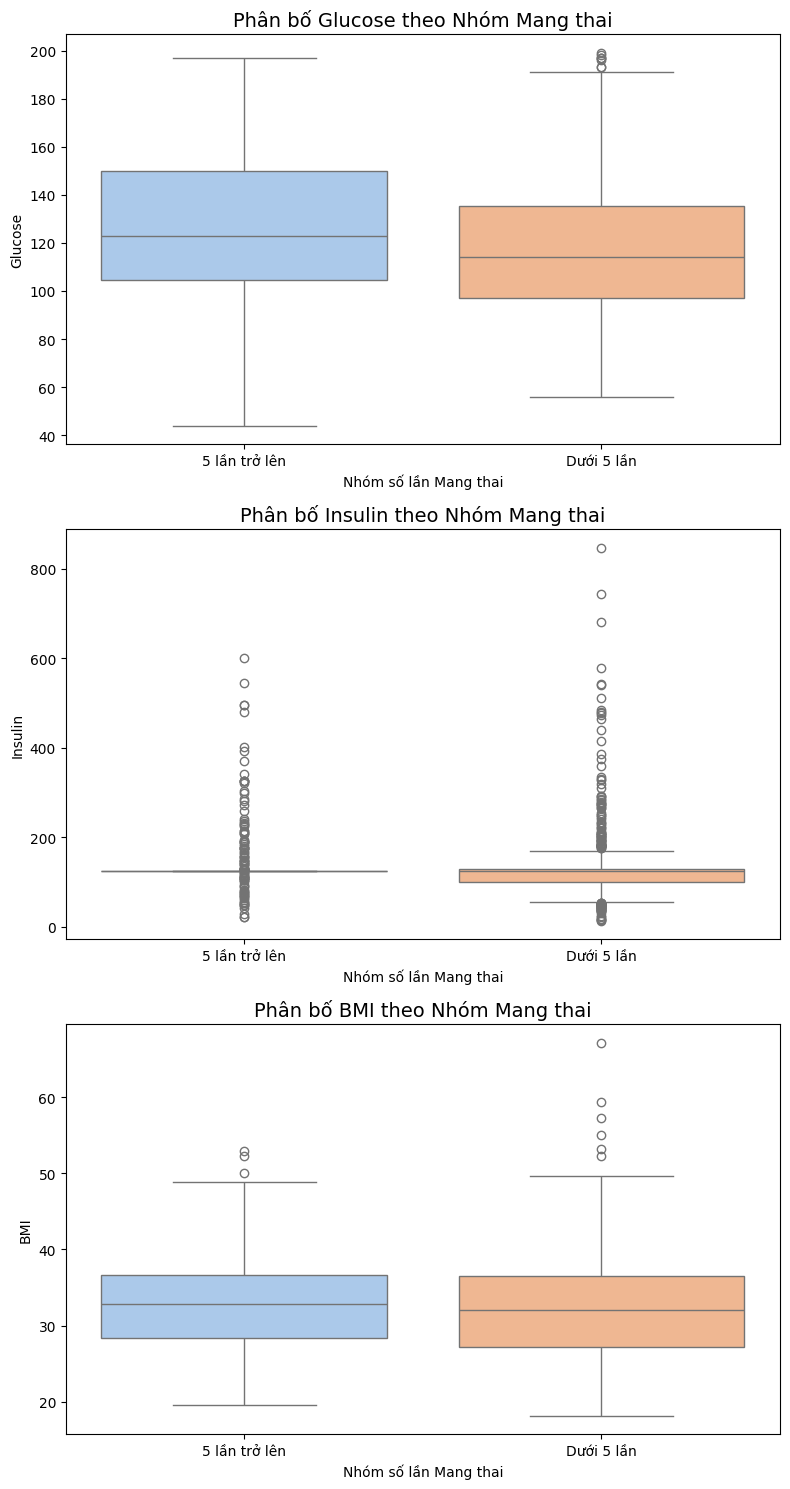

In [ ]:
# Bước 1: Phân loại bệnh nhân thành hai nhóm mang thai
df1['Pregnancy_Group'] = df1['Pregnancies'].apply(lambda x: '5 lần trở lên' if x >= 5 else 'Dưới 5 lần')

# Bước 2: Liệt kê các cột cần phân tích
analysis_cols = ['Glucose', 'Insulin', 'BMI']

# Bước 3: Tạo một lưới các biểu đồ hộp với bố cục hàng dọc (3 hàng, 1 cột)
fig, axes = plt.subplots(3, 1, figsize=(8, 15)) # Điều chỉnh figsize cho bố cục dọc
axes = axes.flatten() # flatten() vẫn hữu ích để lặp qua các axes dễ dàng

for i, col in enumerate(analysis_cols):
    sns.boxplot(x='Pregnancy_Group', y=col, data=df1, ax=axes[i], palette='pastel', hue='Pregnancy_Group', legend=False)
    axes[i].set_title(f'Phân bố {col} theo Nhóm Mang thai', fontsize=14)
    axes[i].set_xlabel('Nhóm số lần Mang thai')
    axes[i].set_ylabel(col)

plt.tight_layout() # Giúp tự động điều chỉnh khoảng cách giữa các subplot
plt.show()

Các biểu đồ hộp này cho phép chúng ta so sánh phân bố của ba chỉ số sức khỏe quan trọng (Glucose, Insulin, BMI) giữa hai nhóm phụ nữ dựa trên số lần mang thai: "Dưới 5 lần" và "5 lần trở lên".

*   **Biểu đồ Glucose:** Nhóm phụ nữ mang thai **từ 5 lần trở lên có xu hướng có nồng độ Glucose cao hơn** so với nhóm mang thai dưới 5 lần. Đường trung vị (median) và phân bố giá trị nhìn chung cao hơn.
*   **Biểu đồ Insulin:** Tương tự như Glucose, nhóm mang thai **từ 5 lần trở lên cũng có xu hướng có nồng độ Insulin cao hơn**.
*   **Biểu đồ BMI:** Nhóm mang thai **từ 5 lần trở lên có vẻ như có chỉ số BMI cao hơn một chút** so với nhóm mang thai dưới 5 lần, dù sự khác biệt có thể không rõ rệt bằng Glucose và Insulin.

**Kết luận:**

Dựa trên quan sát trực quan từ các biểu đồ hộp, có thể kết luận rằng **số lần mang thai nhiều (từ 5 lần trở lên) có liên quan đến việc có chỉ số Glucose, Insulin và có thể cả BMI cao hơn** trong tập dữ liệu này. Điều này gợi ý rằng số lần mang thai có thể là một yếu tố đóng góp vào nguy cơ mắc bệnh tiểu đường, thông qua ảnh hưởng đến các chỉ số trao đổi chất này. Nhóm phụ nữ mang thai nhiều lần dường như có hồ sơ sức khỏe liên quan đến nguy cơ tiểu đường kém thuận lợi hơn.



---



### **Q7) Nhóm bệnh nhân trẻ + BMI cao + nhiều Pregnancies có nguy cơ mắc tiểu đường cao hơn không?**

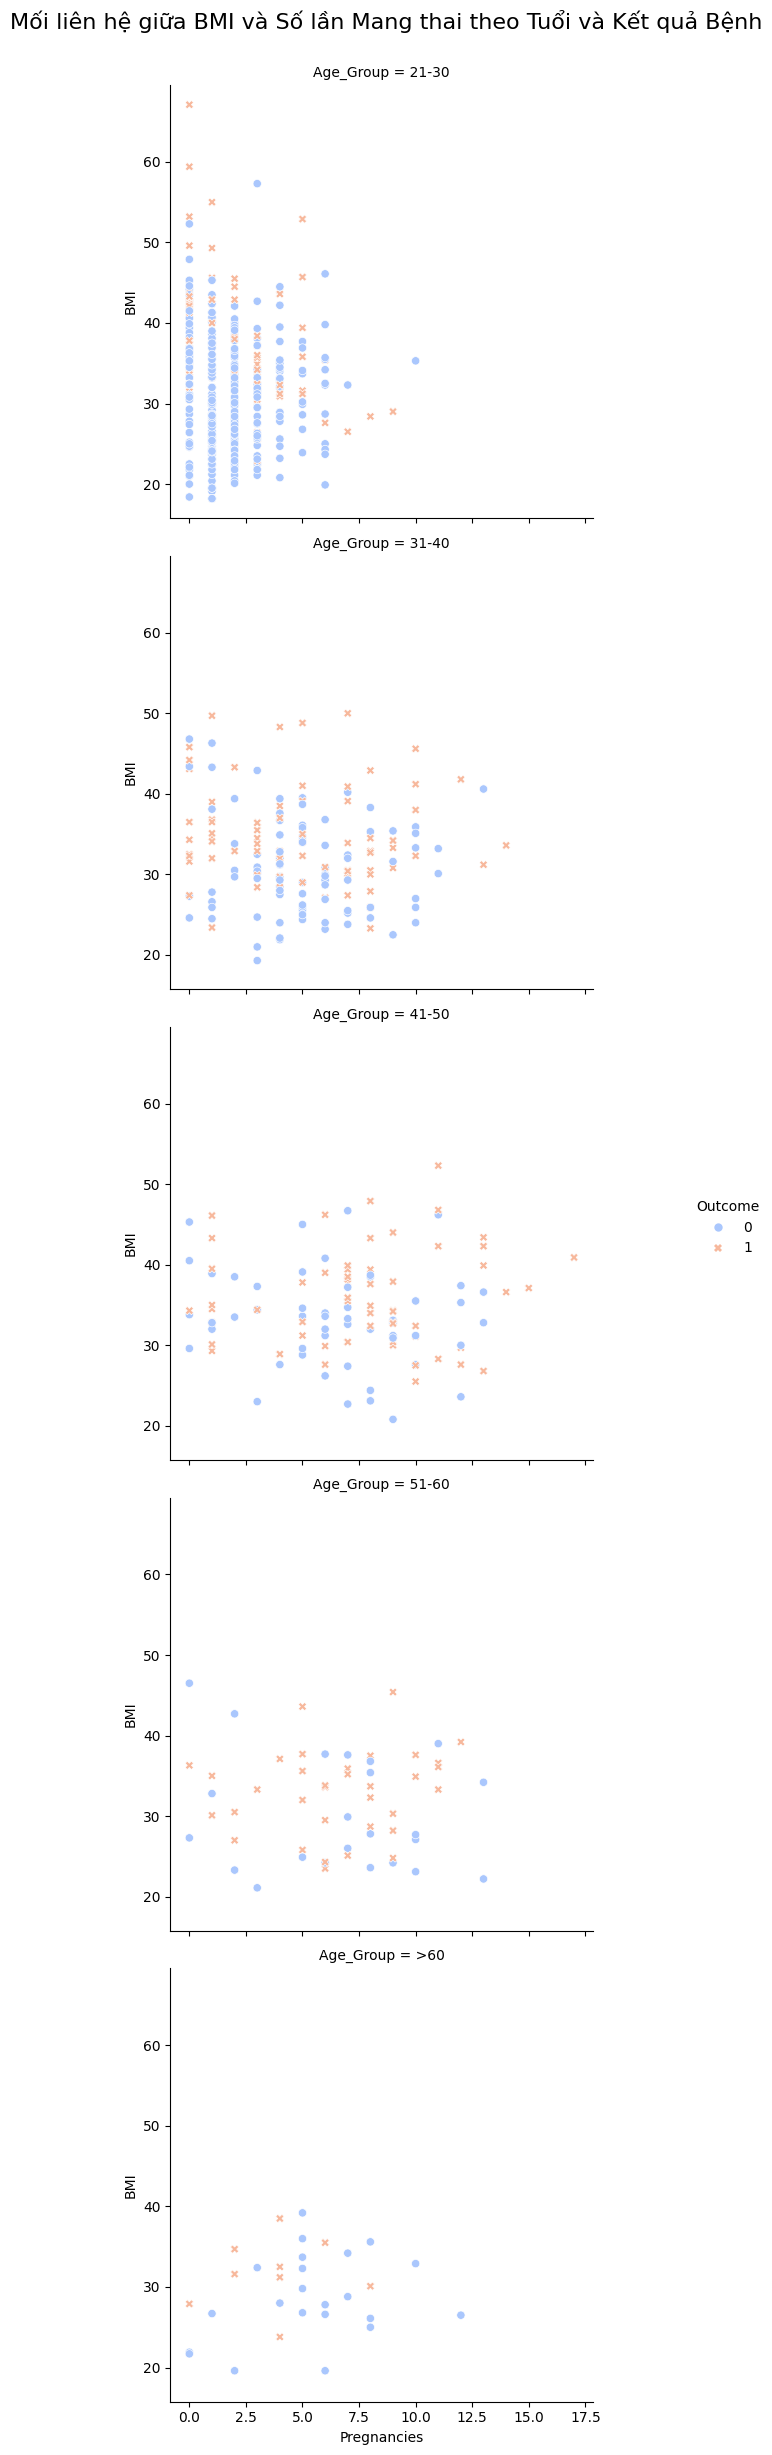

In [ ]:
# Bước 1: Phân loại Tuổi thành các nhóm để dễ phân tích
bins_age = [20, 30, 40, 50, 60, df1['Age'].max()]
labels_age = ['21-30', '31-40', '41-50', '51-60', '>60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins_age, labels=labels_age, right=False)

# Bước 2: Tạo biểu đồ phân tán với các ô được chia theo nhóm tuổi
sns.relplot(
    data=df1,
    x='Pregnancies',
    y='BMI',
    row='Age_Group', # Phân tách theo Nhóm tuổi
    hue='Outcome',
    palette='coolwarm',
    style='Outcome'
)

# Thêm tiêu đề chung
plt.subplots_adjust(top=0.95)
plt.suptitle('Mối liên hệ giữa BMI và Số lần Mang thai theo Tuổi và Kết quả Bệnh', fontsize=16)

plt.show()

Biểu đồ đa biến này là một công cụ mạnh mẽ để khám phá mối quan hệ phức tạp giữa các yếu tố. Phân tích cho thấy ba yếu tố này không chỉ tác động riêng lẻ mà còn tương tác với nhau để tạo ra các mức độ rủi ro khác nhau.

+ **Nhóm Bệnh nhân Trẻ (21-30 tuổi):**

    Phân tích cho thấy một cụm rủi ro rõ rệt: Nhóm bệnh nhân trẻ có BMI cao và số lần mang thai nhiều có nguy cơ mắc bệnh tiểu đường cao hơn rõ rệt.

    Các trường hợp mắc bệnh (biểu tượng "x" màu cam) tập trung chủ yếu ở những người có BMI trên 35 và số lần mang thai từ 5 lần trở lên. Điều này cho thấy sự kết hợp của hai yếu tố này là chỉ báo chính để phát hiện sớm bệnh ở người trẻ.

+ **Nhóm Tuổi Trung niên (31-50 tuổi):**

    Khi tuổi tác tăng lên, số lượng bệnh nhân mắc bệnh cũng tăng lên đáng kể.

    Mặc dù BMI cao và số lần mang thai nhiều vẫn là các yếu tố quan trọng, các trường hợp mắc bệnh bắt đầu phân tán rộng hơn trên biểu đồ. Điều này cho thấy yếu tố tuổi tác bắt đầu đóng vai trò lớn hơn trong việc tăng nguy cơ mắc bệnh.

+ **Nhóm Tuổi Lớn Hơn (>50 tuổi):**

    Trong nhóm này, tỷ lệ mắc bệnh tiếp tục tăng cao. Các trường hợp mắc bệnh xuất hiện ở nhiều vùng khác nhau, thậm chí với số lần mang thai thấp và BMI ở mức trung bình.

    Điều này cho thấy ở người lớn tuổi, tuổi tác trở thành yếu tố nguy cơ áp đảo và có thể dẫn đến bệnh tiểu đường ngay cả khi các yếu tố khác không ở mức đáng báo động.

**Kết luận**

Sự kết hợp giữa Số lần Mang thai, BMI và Tuổi có ảnh hưởng rất lớn đến nguy cơ mắc bệnh tiểu đường, nhưng vai trò của chúng thay đổi tùy theo nhóm tuổi.

Với bệnh nhân trẻ, BMI cao và số lần mang thai nhiều là những yếu tố dự báo quan trọng nhất.

Với bệnh nhân lớn tuổi, yếu tố tuổi tác trở nên nổi bật và có thể chi phối các yếu tố khác trong việc đánh giá nguy cơ.

## **(7) Phân tích thời gian / vòng đời (Time / Lifecycle Analysis, nếu có cột thời gian)**

### **Q1) Xu hướng mắc bệnh tiểu đường theo từng nhóm tuổi: 20–29, 30–39, 40–49, 50+**


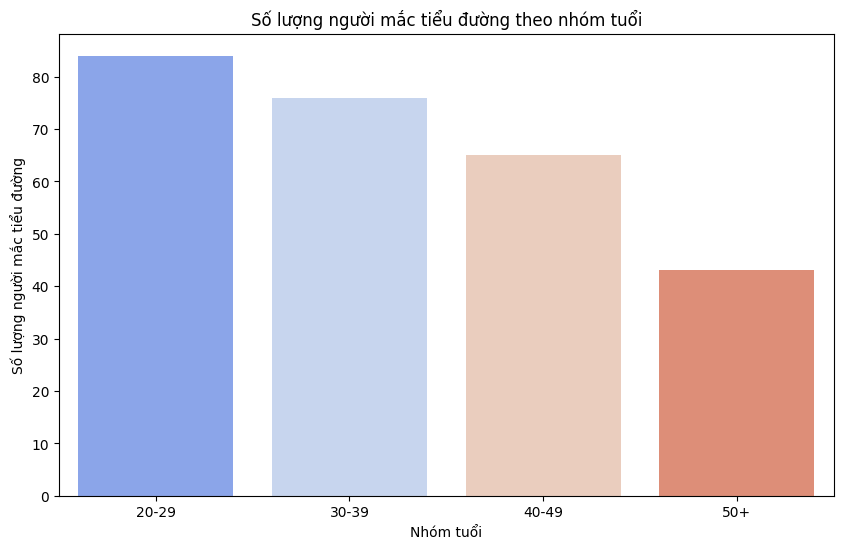

In [ ]:
# Biểu đồ cột (bar chart) hiển thị số lượng người mắc tiểu đường theo từng nhóm tuổi
age_diabetes = df1[df1['Outcome'] == 1]['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_diabetes.index, y=age_diabetes.values, palette='coolwarm', hue=age_diabetes.index, legend=False)
plt.title('Số lượng người mắc tiểu đường theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng người mắc tiểu đường')
plt.show()

- Biểu đồ cho thấy đối tượng của bệnh tiểu đường đang tập trung ở độ tuổi 20-29
- Điều này cho thấy nguy cơ mắc tiểu đường tăng theo tuổi, đặc biệt là ở những người trên 50 tuổi.

### **Q2) Tỷ lệ mắc bệnh theo độ tuổi kết hợp với BMI**

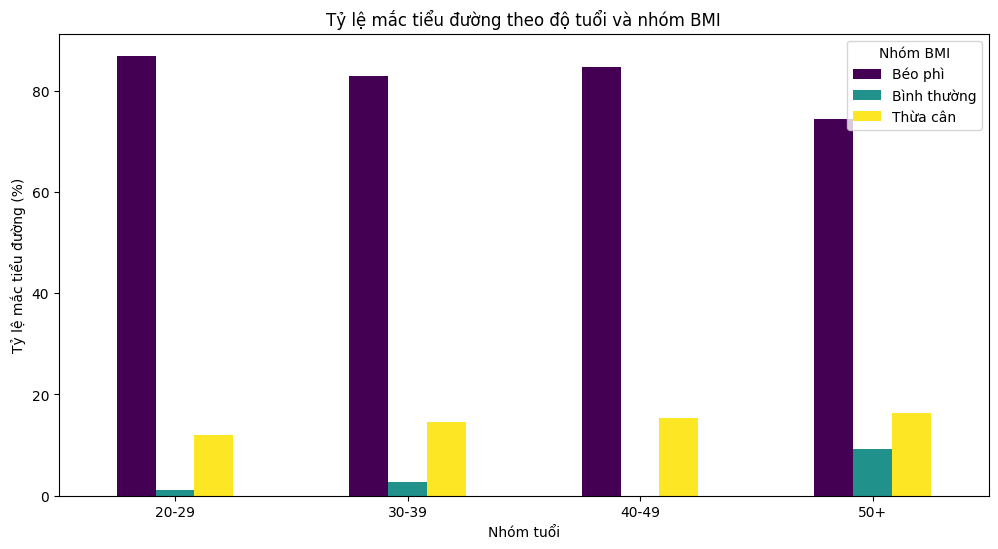

In [ ]:
# Bảng biểu thị tỷ lệ mắc tiểu đường theo độ tuổi và nhóm BMI
age_bmi_diabetes = df1[df1['Outcome'] == 1].groupby(['Age_Group', 'BMI_Category']).size().unstack(fill_value=0)
age_bmi_diabetes = age_bmi_diabetes.div(age_bmi_diabetes.sum(axis=1), axis=0) * 100  # Chuyển đổi sang tỷ lệ phần trăm
age_bmi_diabetes.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0)
plt.title('Tỷ lệ mắc tiểu đường theo độ tuổi và nhóm BMI')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỷ lệ mắc tiểu đường (%)')
plt.legend(title='Nhóm BMI')
plt.show()

- Phân tích và ý nghĩa biểu đồ:
- Biểu đồ cho thấy tỷ lệ mắc tiểu đường trong các nhóm tuổi khác nhau, phân theo nhóm BMI.
- Nhóm tuổi cao hơn và nhóm BMI cao hơn có tỷ lệ mắc tiểu đường cao hơn, đặc biệt là những người trên 50 tuổi với BMI từ 25 trở lên.

## **(8) Phân tích rủi ro & yếu tố quan trọng (Risk & Feature Importance Analysis)**

### **Q1) Xác định ngưỡng an toàn cho Glucose để giảm rủi ro.**

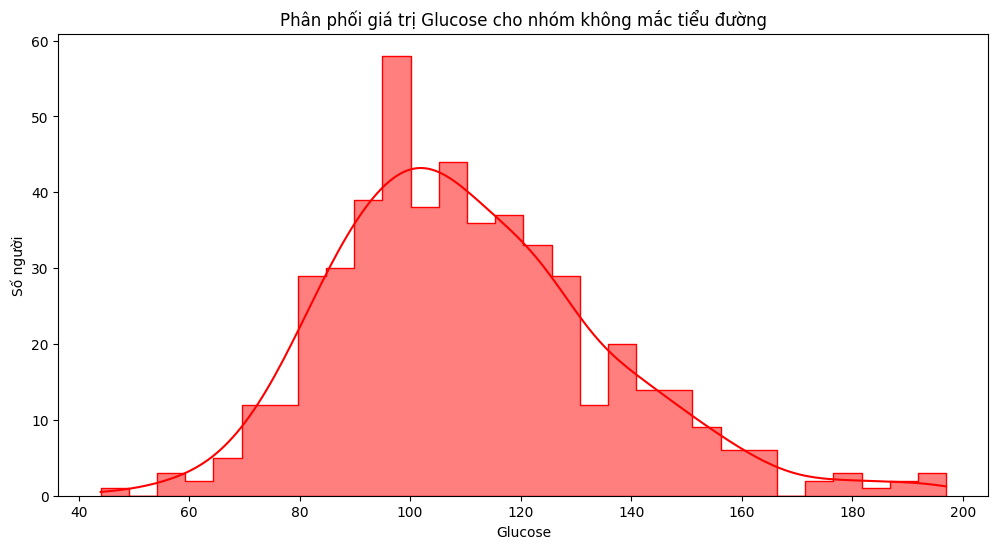

In [ ]:
# Bảng phân phối giá Glucose cho nhóm không mắc tiểu đường
plt.figure(figsize=(12, 6))
sns.histplot(data=df1[df1['Outcome'] == 0], x='Glucose', bins=30, kde=True, element='step', color='red')
plt.title('Phân phối giá trị Glucose cho nhóm không mắc tiểu đường')
plt.xlabel('Glucose')
plt.ylabel('Số người')
plt.show()

- Biểu đồ cho thấy phân phối giá trị Glucose trong nhóm không mắc tiểu đường.
- Từ biểu đồ, có thể xác định ngưỡng an toàn cho Glucose, có thể là khoảng 100 mg/dL.
- Sau ngưỡng 100 mg/dL số người không mắc bệnh tiểu đường giảm mạnh.

### **Q2) Xác định ngưỡng an toàn cho BMI để giảm rủi ro.**

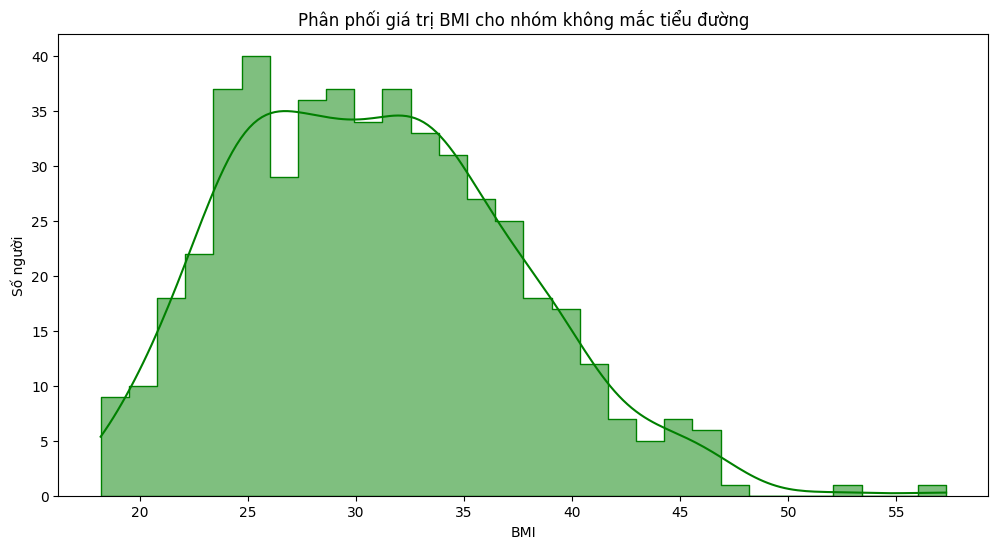

In [ ]:
# Bảng phân phối giá trị BMI cho nhóm không mắc tiểu đường
plt.figure(figsize=(12, 6))
sns.histplot(data=df1[df1['Outcome'] == 0], x='BMI', bins=30, kde=True, element='step', color='green')
plt.title('Phân phối giá trị BMI cho nhóm không mắc tiểu đường')
plt.xlabel('BMI')
plt.ylabel('Số người')
plt.show()

- Biểu đồ cho thấy phân phối giá trị BMI trong nhóm không mắc tiểu đường.
- Từ biểu đồ, có thể xác định ngưỡng an toàn cho BMI, có thể là khoảng 25 (bình thường) để giảm rủi ro mắc tiểu đường.

# **Kết luận**

Với bộ dữ liệu Pima Indians Diabetes, chúng ta đã phân tích nhiều yếu tố nhân khẩu học, chỉ số cơ thể và sinh lý để tìm ra tác động của chúng đến nguy cơ mắc tiểu đường type 2.

Kết quả cho thấy số lần mang thai, BMI và tuổi tác là ba yếu tố quan trọng nhất, với mức ảnh hưởng thay đổi theo từng nhóm tuổi. Ở người trẻ, BMI cao và nhiều lần mang thai làm tăng rủi ro rõ rệt, trong khi ở người lớn tuổi, tuổi tác trở thành yếu tố áp đảo.

Bên cạnh đó, việc duy trì Glucose dưới 100 mg/dL và BMI dưới 25 được xem là ngưỡng an toàn để giảm thiểu nguy cơ mắc bệnh. Điều này không chỉ trả lời cho câu hỏi mở đầu mà còn cung cấp định hướng hữu ích cho công tác phòng ngừa và quản lý sức khỏe cộng đồng.

# **Kết thúc**